# Import Libraries

In [1]:
# Calmap package
!pip install calmap
# Duck
!pip install duckdb
# Viasualization packages
!pip install sweetviz
!pip install pygwalker
!pip install xgboost
!pip install pydot
!pip install visualkeras
!pip install graphviz

In [2]:
# Basic libraries
import numpy as np
from numpy import inf
import pandas as pd
import warnings
from datetime import datetime

# Machine Learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression, Ridge
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, fbeta_score, mean_squared_error, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import calmap

# Other libraries
import requests
import tabulate
from scipy import stats
from scipy.stats import norm
import duckdb
import time
colors = ['#66b3ff', '#ff9999']

# Plotly offline mode
pyo.init_notebook_mode(connected=True)

# Set the warning filter to ignore
warnings.filterwarnings("ignore")

# Set the display options
pd.options.display.max_columns = None

# Set the color palette
sns.set_palette(sns.color_palette())


In [3]:
%pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, RFE, SelectPercentile
from sklearn.compose import ColumnTransformer
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
import matplotlib.patches as mpatches
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from scipy.stats import chi2

# Explore the data

In [5]:
# # Data
# # Read the Excel file and select specific sheets
# sheets_to_read = ['Pivots Field', 'Sheet3', 'Data', 'WOE and Distribution', 'Sheet2', 'Model Validate']
# df_dict = pd.read_excel("C:\\Users\\lekho\\OneDrive\\FIZO\\Anti Fraud FPD30\\New Score.xlsx", sheet_name=sheets_to_read)

# # Access the data from each sheet using the sheet names as keys in the DataFrame dictionary
# sheet1_data = df_dict['Sheet2']
# sheet2_data = df_dict['Pivots Field']

In [6]:
%pip install pyarrow
%pip install feather-format

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
# # Data
# # Read the Excel file and select specific sheets
# sheets_to_read = ['Data']
# df_dict = pd.read_excel("C:\\Users\\lekho\\OneDrive\\FIZO\\Anti Fraud FPD30\\DataGroup.xlsx", sheet_name=sheets_to_read)

# # Access the data from each sheet using the sheet names as keys in the DataFrame dictionary
# sheet1_data = df_dict['Data']

In [8]:
# # Save the DataFrame to Feather
# sheet1_data.to_parquet("data.parquet")

In [9]:
# Read data from Parquet file
df = pd.read_parquet("C:\\Users\\lekho\\OneDrive\\FIZO\\Anti Fraud FPD30\\data.parquet")

In [10]:
# # Generating the dataframe
# df = pd.DataFrame(sheet1_data)

## Data Overview

In [11]:
# Get basic statistics of the numerical columns
print("\nData Statistics:")
df.describe()


Data Statistics:


,mainIncome,familyCosts,i_sent_partner,loanCode,amount,month,repayment_amount_by_month,loan_status_id,outSideApp,idTrigger,phoneTrigger,userTrigger,userTriggerNew,createTimeTrigger,csTokenTrigger,emailTrigger,addressTrigger,deviceTokenTrigger,FPD1,FPD1_OBS,FPD5,FPD5_OBS,FPD10,FPD10_OBS,FPD30,FPD30_OBS,FS_PD30_OBS,FST_PD30_OBS,SPD30,SPD30_OBS,TPD30,TPD30_OBS,DEL30MOB4_HIS,DEL30MOB4_BASE,GW_TELCO_SCORE,UserScore
count,2.566170e+05,2.563960e+05,256617.000000,2.566170e+05,2.566160e+05,256616.000000,2.566140e+05,256617.000000,256617.000000,256617.000000,256617.000000,256617.000000,256617.000000,256617.000000,256617.000000,256617.000000,256617.000000,256617.000000,45884.000000,45884.0,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,45884.000000,144453.000000,256616.000000
mean,1.296446e+07,3.055457e+06,0.995815,1.000007e+11,2.133500e+07,19.695522,1.607504e+06,8.452055,0.102378,0.009664,0.003757,0.006060,0.013810,0.010966,0.001617,0.068752,0.016706,0.039814,0.202489,1.0,0.092189,0.991391,0.073446,0.984984,0.044504,0.961708,0.916136,0.831357,0.034849,0.916136,0.030751,0.831357,0.087351,0.783628,611.073879,594.983283
std,5.581450e+06,2.561344e+06,0.064558,1.267744e+05,1.069778e+07,8.458022,5.769753e+05,0.865720,0.303146,0.097831,0.061176,0.077607,0.116704,0.104142,0.040182,0.253033,0.128167,0.195523,0.401859,0.0,0.289296,0.092384,0.260870,0.121618,0.206213,0.191903,0.277186,0.374440,0.183399,0.277186,0.172645,0.374440,0.282351,0.411775,126.765968,11.511046
min,1.000000e+01,0.000000e+00,0.000000,1.000004e+11,3.000000e+06,3.000000,3.320000e+05,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,299.000000,570.664356
25%,9.500000e+06,2.000000e+06,1.000000,1.000006e+11,2.000000e+07,12.000000,1.292000e+06,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,545.000000,585.609559
50%,1.200000e+07,3.000000e+06,1.000000,1.000007e+11,2.000000e+07,18.000000,1.412000e+06,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,624.000000,595.792983
75%,1.500000e+07,4.000000e+06,1.000000,1.000008e+11,2.000000e+07,24.000000,2.122000e+06,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,703.000000,604.420197
max,5.000000e+08,6.000000e+08,1.000000,1.000010e+11,5.000000e+07,36.000000,5.012000e+06,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,850.000000,619.031622


Display the first row of the DataFrame df. This is useful for getting a quick overview of the data and understanding the structure and values in the DataFrame.

In [12]:
# Overview data
df.head(1)

,week,vnpostProvinceName,vnpostDistrictName,vnpostOrganizationName,vnpostLevel,vnpostUserName,EmployeeType,gender,dob,email,occupationalStatus,jobType,purpose,maritalStatus,mainIncome,familyCosts,cityTerm,cityPermanent,bank,i_sent_partner,created_date,submit_date,sent_date,cancel_date,reject_date,approved_date,disbursed_date,terminated_date,last_modified_date,loanCode,partner,product,amount,month,disbursementType,repayment_amount_by_month,loan_status,loan_status_id,reason,createDevice,submitDevice,outSideApp,idTrigger,phoneTrigger,userTrigger,userTriggerNew,createTimeTrigger,csTokenTrigger,emailTrigger,addressTrigger,deviceTokenTrigger,FPD1,FPD1_OBS,FPD5,FPD5_OBS,FPD10,FPD10_OBS,FPD30,FPD30_OBS,FS_PD30_OBS,FST_PD30_OBS,SPD30,SPD30_OBS,TPD30,TPD30_OBS,DEL30MOB4_HIS,DEL30MOB4_BASE,GW_TELCO_SCORE,cityTerm_economic_region,cityPermanent_economic_region,ScoreGroup,UserScore
0,2023-06-25 07:00:00,Bưu điện Tỉnh Thanh Hóa,BĐH Hoằng Hóa,Điểm BĐVHX Hoằng Lưu,BĐ-VHX,44.1793,NV,Nữ,1990-06-06 07:00:00,lethithuy7970@gmail.com,None,Công nhân,"Bảo trì nhà, trang thiết bị",Kết hôn,10000000,2300000.0,Tỉnh Thanh Hóa,Tỉnh Thanh Hóa,Ngân hàng TMCP Sài Gòn Thương Tín – Sacombank,1,2023-07-01 04:22:49,2023-07-01 04:35:31,2023-07-01 04:35:37,None,2023-07-01 04:36:12,NaT,NaT,NaT,2023-07-01 04:36:12,100001018912,TPBank,VAY TOÀN DIỆN ĐẾN 35 TRIỆU (CMND/CCCD) - Điều ...,35000000.0,36.0,Chuyển khoản,1602000.0,Từ Chối,8,Khách hàng không thỏa điều kiện,OPPO,OPPO,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,519.0,Central Economic Region,Central Economic Region,7. 610- 620,615.113956


In [13]:
# Shape of raw data
print("Fraud Detection data -  rows:",df.shape[0]," columns:", df.shape[1])
df.info()

Fraud Detection data -  rows: 256617  columns: 72
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256617 entries, 0 to 256616
Data columns (total 72 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   week                           256617 non-null  datetime64[ns]
 1   vnpostProvinceName             256617 non-null  object        
 2   vnpostDistrictName             256617 non-null  object        
 3   vnpostOrganizationName         256617 non-null  object        
 4   vnpostLevel                    256617 non-null  object        
 5   vnpostUserName                 256617 non-null  object        
 6   EmployeeType                   256617 non-null  object        
 7   gender                         256617 non-null  object        
 8   dob                            256617 non-null  datetime64[ns]
 9   email                          234943 non-null  object        
 10  occupationalStatus

In [14]:
# Count the occurrences of each unique value in the 'loan_status' column
status_counts = df['loan_status'].value_counts()

# Calculate the percentages
status_percentages = status_counts / len(df) * 100

# Display the percentages
print("Loan Status Percentages:")
print(status_percentages)

Loan Status Percentages:
Từ Chối         78.225137
Đã Giải Ngân    20.115191
Đã Tất Toán      1.657723
Đã Ký            0.001948
Name: loan_status, dtype: float64


In [15]:
import plotly.express as px

# Calculate the percentage values and create a DataFrame
status_percentages_df = pd.DataFrame({'Status': status_percentages.index, 'Percentage': status_percentages.values})

# Plot the pie chart
fig = px.pie(status_percentages_df, values='Percentage', names='Status', color='Status', 
             color_discrete_map={'Default': 'red', 'Other': 'blue', 'Another': 'green'})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Percentage of Loan Status')

# Display the pie chart
fig.show()


In [16]:
# Select rows with specific loan_status values
selected_statuses = ['Từ Chối', 'Đã Giải Ngân', 'Đã Tất Toán', 'Đã Ký']
# selected_statuses = ['Đã Giải Ngân', 'Đã Tất Toán', 'Đã Ký']
df = df[df['loan_status'].isin(selected_statuses)]

## Preprocessing model

### Check NA

In [17]:
# Glimpse NA %
data_df = df
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,cancel_date,terminated_date,occupationalStatus,FS_PD30_OBS,SPD30,FPD1_OBS,FPD5,FPD5_OBS,FPD10,FPD10_OBS,FPD30,FPD30_OBS,FST_PD30_OBS,FPD1,SPD30_OBS,TPD30_OBS,DEL30MOB4_BASE,DEL30MOB4_HIS,TPD30,approved_date,disbursed_date,bank,GW_TELCO_SCORE,reject_date,reason,email,submitDevice,createDevice,sent_date,familyCosts,submit_date,repayment_amount_by_month,month,UserScore,amount,ScoreGroup,userTriggerNew,deviceTokenTrigger,addressTrigger,cityTerm_economic_region,cityPermanent_economic_region,emailTrigger,csTokenTrigger,createTimeTrigger,week,userTrigger,cityTerm,vnpostDistrictName,vnpostOrganizationName,vnpostLevel,vnpostUserName,EmployeeType,gender,dob,jobType,purpose,maritalStatus,mainIncome,cityPermanent,phoneTrigger,i_sent_partner,created_date,last_modified_date,loanCode,partner,product,disbursementType,vnpostProvinceName,loan_status_id,outSideApp,idTrigger,loan_status
Total,256392.000000,252363.000000,221743.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,210733.000000,201067.000000,200743.000000,174271.000000,112164.000000,55913.000000,55913.000000,21674.00000,7904.000000,5715.000000,5269.000000,221.000000,177.000000,3.000000,1.00000,1.00000,1.00000,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,99.912321,98.342277,86.410098,82.119657,82.119657,82.119657,82.119657,82.119657,82.119657,82.119657,82.119657,82.119657,82.119657,82.119657,82.119657,82.119657,82.119657,82.119657,82.119657,78.352954,78.226696,67.910933,43.708718,21.788502,21.788502,8.44605,3.080077,2.227054,2.053254,0.086121,0.068974,0.001169,0.00039,0.00039,0.00039,0.00039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Calculate the percentage of NA values in each column
na_cols = (df.isnull().sum() / df.shape[0]) * 100

# Select columns where the percentage of NA values is greater than 80%
cols_to_drop = na_cols[na_cols > 85].index

# drop the selected columns from the DataFrame
df = df.drop(columns=cols_to_drop)

In [19]:
# group_province_by_economic_region
northern_region = ['Bưu điện Tỉnh Yên Bái', 'Bưu điện Tỉnh Hòa Bình', 'Bưu điện Tỉnh Sơn La', 'Bưu điện Tỉnh Lào Cai', 'Bưu điện Tỉnh Lai Châu', 'Bưu điện Tỉnh Điện Biên', 'Bưu điện TP Hà Nội', 'Bưu điện TP Hải Phòng', 'Bưu điện Tỉnh Quảng Ninh', 'Bưu điện Tỉnh Hà Nam', 'Bưu điện Tỉnh Hưng Yên', 'Bưu điện Tỉnh Bắc Ninh', 'Bưu điện Tỉnh Hải Dương', 'Bưu điện Tỉnh Vĩnh Phúc', 'Bưu điện Tỉnh Bắc Giang', 'Bưu điện Tỉnh Lạng Sơn', 'Bưu điện Tỉnh Phú Thọ', 'Bưu điện Tỉnh Thái Nguyên', 'Bưu điện Tỉnh Tuyên Quang', 'Bưu điện Tỉnh Cao Bằng', 'Bưu điện Tỉnh Bắc Kạn', 'Bưu điện Tỉnh Hà Giang']
central_region = ['Bưu điện Tỉnh Thanh Hóa', 'Bưu điện Tỉnh Nghệ An', 'Bưu điện Tỉnh Hà Tĩnh', 'Bưu điện Tỉnh Quảng Bình', 'Bưu điện Tỉnh Quảng Trị', 'Bưu điện Tỉnh Thừa Thiên Huế', 'Bưu điện TP Đà Nẵng', 'Bưu điện Tỉnh Quảng Nam', 'Bưu điện Tỉnh Quảng Ngãi', 'Bưu điện Tỉnh Bình Định', 'Bưu điện Tỉnh Phú Yên', 'Bưu điện Tỉnh Khánh Hòa', 'Bưu điện Tỉnh Ninh Thuận', 'Bưu điện Tỉnh Bình Thuận']
southern_region = ['Bưu điện TP Hồ Chí Minh','Bưu điện Tỉnh Bình Phước', 'Bưu điện Tỉnh Đồng Nai', 'Bưu điện Tỉnh Bình Dương', 'Bưu điện Tỉnh Bà Rịa Vũng Tàu', 'Bưu điện Tỉnh Tây Ninh', 'Bưu điện Tỉnh Long An', 'Bưu điện Tỉnh Tiền Giang', 'Bưu điện Tỉnh Bến Tre', 'Bưu điện Tỉnh Đồng Tháp', 'Bưu điện Tỉnh Vĩnh Long', 'Bưu điện Tỉnh Cần Thơ', 'Bưu điện Tỉnh Hậu Giang', 'Bưu điện Tỉnh An Giang', 'Bưu điện Tỉnh Kiên Giang', 'Bưu điện Tỉnh Cà Mau', 'Bưu điện Tỉnh Sóc Trăng', 'Bưu điện Tỉnh Bạc Liêu', 'Bưu điện Tỉnh Trà Vinh']
red_river_delta_region = ['Bưu điện Tỉnh Thái Bình', 'Bưu điện Tỉnh Nam Định', 'Bưu điện Tỉnh Ninh Bình', 'Bưu điện Tỉnh Hà Nam', 'Bưu điện Tỉnh Hải Dương', 'Bưu điện Tỉnh Hưng Yên']
mekong_river_delta_region = ['Bưu điện TP Cần Thơ', 'Bưu điện Tỉnh An Giang', 'Bưu điện Tỉnh Đồng Tháp', 'Bưu điện Tỉnh Vĩnh Long', 'Bưu điện Tỉnh Tiền Giang', 'Bưu điện Tỉnh Hậu Giang', 'Bưu điện Tỉnh Kiên Giang', 'Bưu điện Tỉnh Bạc Liêu', 'Bưu điện Tỉnh Cà Mau', 'Bưu điện Tỉnh Sóc Trăng', 'Bưu điện Tỉnh Trà Vinh']
central_highlands_region = ['Bưu điện Tỉnh Đắk Lắk', 'Bưu điện Tỉnh Gia Lai', 'Bưu điện Tỉnh Kon Tum', 'Bưu điện Tỉnh Đắk Nông', 'Bưu điện Tỉnh Lâm Đồng']

def group_province_by_economic_region(province_name):
    if province_name in northern_region:
        return 'Northern Economic Region'
    elif province_name in central_region:
        return 'Central Economic Region'
    elif province_name in southern_region:
        return 'Southern Economic Region'
    elif province_name in red_river_delta_region:
        return 'Red River Delta Economic Region'
    elif province_name in mekong_river_delta_region:
        return 'Mekong River Delta Economic Region'
    elif province_name in central_highlands_region:
        return 'Central Highlands Economic Region'
    else:
        return 'Unknown Economic Region'

# Example usage
df['economic_region'] = df['vnpostProvinceName'].apply(group_province_by_economic_region)

In [20]:
# group_province_by_population_region
low_density_regions = ['Bưu điện Tỉnh Lào Cai', 'Bưu điện Tỉnh Điện Biên', 'Bưu điện Tỉnh Lai Châu', 'Bưu điện Tỉnh Sơn La', 'Bưu điện Tỉnh Yên Bái', 'Bưu điện Tỉnh Hà Giang', 'Bưu điện Tỉnh Cao Bằng', 'Bưu điện Tỉnh Tuyên Quang', 'Bưu điện Tỉnh Phú Thọ', 'Bưu điện Tỉnh Thái Nguyên', 'Bưu điện Tỉnh Lạng Sơn', 'Bưu điện Tỉnh Quảng Ninh', 'Bưu điện Tỉnh Hòa Bình', 'Bưu điện Tỉnh Sơn La', 'Bưu điện Tỉnh Yên Bái', 'Bưu điện Tỉnh Hà Nam', 'Bưu điện Tỉnh Hưng Yên', 'Bưu điện Tỉnh Bắc Ninh', 'Bưu điện Tỉnh Hải Dương', 'Bưu điện Tỉnh Vĩnh Phúc', 'Bưu điện Tỉnh Bắc Giang', 'Bưu điện Tỉnh Thanh Hóa', 'Bưu điện Tỉnh Nghệ An', 'Bưu điện Tỉnh Hà Tĩnh', 'Bưu điện Tỉnh Quảng Bình', 'Bưu điện Tỉnh Quảng Trị', 'Bưu điện Tỉnh Thừa Thiên Huế', 'Bưu điện Tỉnh Ninh Thuận', 'Bưu điện Tỉnh Bình Thuận', 'Bưu điện Tỉnh Bình Định', 'Bưu điện Tỉnh Phú Yên', 'Bưu điện Tỉnh Kon Tum', 'Bưu điện Tỉnh Gia Lai', 'Bưu điện Tỉnh Đắk Lắk', 'Bưu điện Tỉnh Đắk Nông', 'Bưu điện Tỉnh Lâm Đồng']

mid_density_regions = ['Bưu điện TP Hà Nội', 'Bưu điện Tỉnh Hải Phòng', 'Bưu điện Tỉnh Hưng Yên', 'Bưu điện Tỉnh Bắc Ninh', 'Bưu điện Tỉnh Hà Nam', 'Bưu điện Tỉnh Hải Dương', 'Bưu điện Tỉnh Vĩnh Phúc', 'Bưu điện Tỉnh Bắc Giang', 'Bưu điện Tỉnh Lạng Sơn', 'Bưu điện Tỉnh Thái Nguyên', 'Bưu điện Tỉnh Quảng Ninh']

high_density_regions = ['Bưu điện TP Hồ Chí Minh', 'Bưu điện Tỉnh Hà Nội', 'Bưu điện Tỉnh Đồng Nai', 'Bưu điện Tỉnh Bình Dương', 'Bưu điện Tỉnh Vĩnh Phúc', 'Bưu điện Tỉnh Bà Rịa Vũng Tàu', 'Bưu điện Tỉnh Long An', 'Bưu điện Tỉnh An Giang', 'Bưu điện Tỉnh Kiên Giang', 'Bưu điện Tỉnh Bình Thuận', 'Bưu điện Tỉnh Tiền Giang', 'Bưu điện Tỉnh Quảng Ninh']

def group_province_by_population_region(province_name):
    if province_name in low_density_regions:
        return 'low_density_regions'
    elif province_name in mid_density_regions:
        return 'mid_density_regions'
    elif province_name in high_density_regions:
        return 'high_density_regions'
    else:
        return 'Unknown Population Region'

# Example usage
df['population_region'] = df['vnpostProvinceName'].apply(group_province_by_population_region)

In [21]:
# Clean the bank name
df['bank'].replace(['TPBANK-NGÂN HÀNG TMCP TIÊN PHONG','Ngân hàng thương mại cổ phần Tiên Phong - TPBank'], 'tpbank' , inplace = True)
df['bank'].replace(['LIENVIETPOSTBANK-NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT','Ngân hàng thương mại cổ phần Bưu điện Liên Việt'], 'lienvietpostbank' , inplace = True)
df['bank'].replace(['HDBANK-NGÂN HÀNG TMCP PHÁT TRIỂN TPHCM','Ngân hàng TMCP Phát triển TP.HCM - HDBank'], 'hdbank' , inplace = True)
df['bank'].replace(['TECHCOMBANK-NGÂN HÀNG TMCP KỸ THƯƠNG VIỆT NAM','Ngân hàng Techcombank'], 'techcombank' , inplace = True)
df['bank'].replace(['AGRIBANK-NGÂN HÀNG NÔNG NGHIỆP VÀ PHÁT TRIỂN NÔNG THÔN','Ngân hàng Nông nghiệp và Phát triển Nông thôn Việt Nam Agribank'], 'agribank' , inplace = True)
df['bank'].replace(['SACOMBANK-NGÂN HÀNG TMCP SÀI GÒN THƯƠNG TÍN','Ngân hàng TMCP Sài Gòn Thương Tín – Sacombank'], 'sacombank' , inplace = True)
df['bank'].replace(['VIETCOMBANK-NGÂN HÀNG TMCP NGOẠI THƯƠNG VIỆT NAM','Ngân hàng thương mại cổ phần Ngoại thương Việt Nam – Vietcombank'], 'vietcombank' , inplace = True)
df['bank'].replace(['NAMABANK-NGÂN HÀNG TMCP NAM Á','Ngân hàng TMCP Nam Á – Nam A Bank'], 'namabank' , inplace = True)
df['bank'].replace(['VIETINBANK-NGÂN HÀNG TMCP CÔNG THƯƠNG VIỆT NAM','Ngân hàng TMCP Công Thương Việt Nam – VietinBank'], 'vietinbank' , inplace = True)
df['bank'].replace(['BIDV-NGÂN HÀNG TMCP ĐẦU TƯ VÀ PHÁT TRIỂN VIỆT NAM','Ngân hàng Đầu tư và Phát triển Việt Nam BIDV'], 'bidv' , inplace = True)
df['bank'].replace(['SAIGONBANK-NGÂN HÀNG TMCP SÀI GÒN CÔNG THƯƠNG','Ngân hàng TMCP Sài Gòn Công Thương – SAIGONBANK'], 'saigonbank' , inplace = True)
df['bank'].replace(['MBBANK-NGÂN HÀNG TMCP QUÂN ĐỘI', 'Ngân hàng Quân đội –MBBank'], 'mbbank' , inplace = True)
df['bank'].replace(['DONGABANK-NGÂN HÀNG TMCP ĐÔNG Á','Ngân Hàng TMCP Đông Á'], 'dongabank' , inplace = True)
df['bank'].replace(['OCB-NGÂN HÀNG TMCP PHƯƠNG ĐÔNG','Ngân hàng TMCP Phương Đông(OCB)'], 'ocb' , inplace = True)
df['bank'].replace(['ACB-NGÂN HÀNG TMCP Á CHÂU','Ngân hàng Á Châu (ACB)'], 'acb' , inplace = True)
df['bank'].replace(['SCB-NGÂN HÀNG TMCP SÀI GÒN','Ngân hàng Thương mại cổ phần Sài Gòn – SCB'], 'scb' , inplace = True)
df['bank'].replace(['VIB-NGÂN HÀNG TMCP QUỐC TẾ','Ngân hàng VIB'], 'vib' , inplace = True)
df['bank'].replace('MSB-NGÂN HÀNG TMCP HÀNG HẢI', 'msb' , inplace = True)
df['bank'].replace(['VPBANK-NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG','Ngân hàng Việt Nam Thịnh Vượng VPBank','TMCP Việt Nam Thịnh Vượng - Ngân hàng số YOLO by VPBank','Ngân hàng số Ubank by VPBank'], 'vpb' , inplace = True)
df['bank'].replace('ABBANK-NGÂN HÀNG TMCP AN BÌNH', 'abbank' , inplace = True)
df['bank'].replace(['PVCOMBANK-NGÂN HÀNG TMCP ĐẠI CHÚNG','Ngân hàng TMCP Đại Chúng Việt Nam'], 'pvcombank' , inplace = True)
df['bank'].replace(['NGÂN HÀNG TNHH MTV SHINHAN VIỆT NAM','Ngân hàng TNHH MTV Shinhan Việt Nam'], 'shinhan' , inplace = True)
df['bank'].replace(['SEABANK-NGÂN HÀNG TMCP ĐÔNG NAM Á','Ngân hàng thương mại cổ phần Đông Nam Á – SeABank'], 'seabank' , inplace = True)
df['bank'].replace(['OCEANBANK-NGÂN HÀNG THƯƠNG MẠI TNHH MTV ĐẠI DƯƠNG','Ngân hàng Đại Dương – OceanBank'], 'oceanbank' , inplace = True)
df['bank'].replace('KIENLONG-NGÂN HÀNG TMCP KIÊN LONG', 'kienlongbank' , inplace = True)
df['bank'].replace(['NCB-NGÂN HÀNG TMCP QUỐC DÂN','Ngân hàng Quốc Dân – NCB'], 'ncb' , inplace = True)
df['bank'].replace(['SHB-NGÂN HÀNG TMCP SÀI GÒN HÀ NỘI','Ngân hàng TMCP Sài Gòn - Hà Nội (SHB)'], 'shb' , inplace = True)
df['bank'].replace(['VIET CAPITAL BANK-NGÂN HÀNG TMCP BẢN VIỆT','Ngân hàng TMCP Bản Việt – Viet Capital Bank'], 'vietcapitalbank' , inplace = True)
df['bank'].replace(['WOORIBANK-WOORI BANK','TNHH MTV Woori Việt Nam'], 'wooribank' , inplace = True)
df['bank'].replace(['EXIMBANK-NGÂN HÀNG TMCP XUẤT NHẬP KHẨU VIỆT NAM','Ngân hàng TMCP Xuất nhập khẩu Việt Nam – Eximbank'], 'eximbank' , inplace = True)
df['bank'].replace('BAOVIETBANK-NGÂN HÀNG TMCP BẢO VIỆT', 'baovietbank' , inplace = True)
df['bank'].replace(['PGBANK-NGÂN HÀNG TMCP XĂNG DẦU PETROLIMEX','Ngân hàng TMCP Xăng dầu Petrolimex (PG Bank)'], 'pgbank' , inplace = True)
df['bank'].replace(['BACABANK-NGÂN HÀNG TMCP BẮC Á','Ngân hàng TMCP Bắc Á– BAC A BANK'], 'bacabank' , inplace = True)
df['bank'].replace('VDB-NGÂN HÀNG PHÁT TRIỂN VIỆT NAM', 'vdb' , inplace = True)
df['bank'].replace('CB-NGÂN HÀNG THƯƠNG MẠI TNHH MTV XÂY DỰNG VIỆT NAM', 'cb' , inplace = True)
df['bank'].replace(['NHTNHHMTVPUBLICVIETNAM-NGÂN HÀNG TNHH MTV PUBLIC VIỆT NAM','Ngân hàng trách nhiệm hữu hạn một thành viên Public Việt Nam'], 'publicbank' , inplace = True)
df['bank'].replace('Ngân hàng Thương mại Cổ phần Hàng Hải Việt Nam (Maritime Bank)', 'maritimebank' , inplace = True)
df['bank'].replace('Ngân hàng Việt Nam Thương Tín – VietBank', 'vietbank' , inplace = True)
df['bank'].replace('Ngân hàng thương mại cổ phần Việt Á – VietABank', 'vietabank' , inplace = True)
df['bank'].replace('Hợp tác xã Việt Nam (Co-opbank)', 'co-opbank' , inplace = True)
df['bank'].replace('Ngân hàng thương mại trách nhiệm hữu hạn một thành viênDầu khí toàn cầu – GP Bank', 'gpbank' , inplace = True)
df['bank'].replace('Ngân hàng Standard Chartered tại Việt Nam', 'standardcharteredbank' , inplace = True)
df['bank'].replace('\xa0Ngân hàng TNHH Indovina', 'indovina' , inplace = True)
df['bank'].replace('Ngân Hàng DBS Bank Ltd - CN TP. Hồ Chí Minh', 'dbsbank' , inplace = True)
df['bank'].replace('Ngân hàng Thương mại Cổ phần Bảo Việt', 'baovietbank' , inplace = True)
df['bank'].replace('Ngân hàng TNHH MTV CIMB Việt Nam', 'cimb' , inplace = True)
df['bank'].replace('Ngân hàng Liên doanh Việt – Nga (VRB)', 'vrb' , inplace = True)
df['bank'].replace('Ngân hàng HSBC Việt Nam', 'hsbc' , inplace = True)

In [22]:
# Clean data
spe_num = df.select_dtypes(include=['float64', 'int64']).columns
spe_obj = df.select_dtypes(include=['object']).columns
spe_date = ['created_date'] 

# Fill NaNs with 0 for numerical data
for col in spe_num:
    df[col] = df[col].fillna(0)

# Fill NaNs with "Null" for categorical/object data
for col in spe_obj:
    df[col] = df[col].fillna("Null")

# Convert and fill datetime columns
for col in spe_date:
    df[col] = pd.to_datetime(df[col], errors='coerce').fillna(pd.to_datetime('2000-01-01')).dt.strftime('%Y/%m/%d')

In [23]:
# Group jobType into two groups: stable_and_self_employed and other
def group_job_type(job_type):
    if job_type in ['Việc làm ổn định', 'Tự doanh']:
        return 'stable_and_self_employed'
    else:
        return 'other'

df['job_group'] = df['jobType'].apply(group_job_type)

In [24]:
# Clean the maritalStatus
df['maritalStatus'].replace(['Ly hôn','Đã ly hôn (vợ / chồng)'], 'Ly hôn' , inplace = True)
df['maritalStatus'].replace(['Đã kết hôn','Kết hôn'], 'Kết hôn' , inplace = True)
df['maritalStatus'].replace('Độc thân', 'Độc Thân' , inplace = True)
df['maritalStatus'].replace(['Góa','Góa vợ/ Goá chồng'], 'Góa' , inplace = True)
df['maritalStatus'].replace('Sống chung', 'Sống chung' , inplace = True)
df['maritalStatus'].unique()

array(['Kết hôn', 'Độc Thân', 'Ly hôn', 'Góa', 'Sống chung'], dtype=object)

In [25]:
# Group maritalStatus into two marital groups: single and not_single
df['marital_group'] = df['maritalStatus'].apply(lambda x: 'single' if x == 'Độc Thân' else 'not_single')

# Group economic_region into two economic groups: north and other
df['economic_group'] = df['economic_region'].apply(lambda x: 'north' if x in ['Northern Economic Region', 'Red River Delta Economic Region'] else 'other')

In [26]:
# Create a list of column names to convert to string
columns_to_convert = ['loanCode']

# Convert the columns to string data type
df[columns_to_convert] = df[columns_to_convert].astype(str)

In [27]:
# Define the BAD variable isolation
df['BAD'] = df['FPD30']

# Viasulization

## Balance in Target

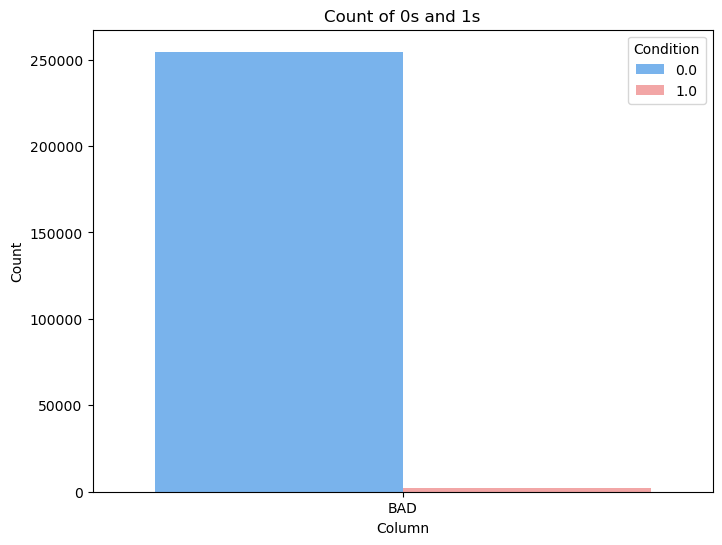

In [28]:
# Select the relevant columns
columns_to_plot = ['BAD']

# Count the occurrences of 0s and 1s in each column
counts = df[columns_to_plot].apply(pd.value_counts).fillna(0).astype(int)

# Reshape the counts DataFrame for plotting
counts = counts.unstack().reset_index()
counts.columns = ['Column', 'Condition', 'Count']

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Column', y='Count', hue='Condition', data=counts, palette=colors)

# Add count labels to the bars
for _, row in counts.iterrows():
    count = row['Count']

# Set labels and title
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Count of 0s and 1s')

# Display the plot
plt.show()

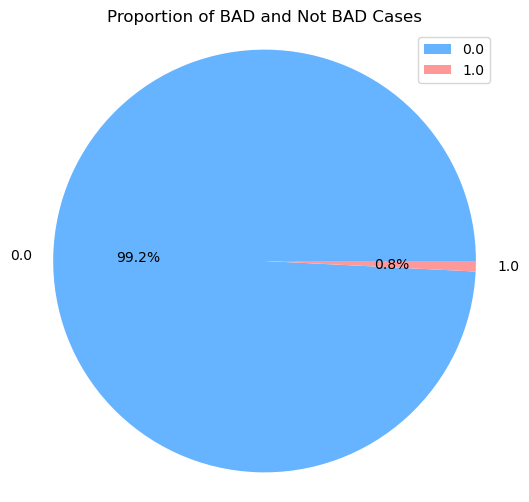

In [29]:
# Creating a copy
counts = df['BAD'].value_counts()
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.axis('equal')
plt.title('Proportion of BAD and Not BAD Cases')
plt.legend()
plt.show()

In [30]:
# Count the occurrences of fraud and no fraud and print them
occ_FlagBad = df['BAD'].value_counts()
occ_FlagBad
# Print the ratio of fraud cases
print(occ_FlagBad / len(df))

0.0    0.992043
1.0    0.007957
Name: BAD, dtype: float64


In [31]:
# Get the list of columns to convert
cols_to_convert = [col for col in df.columns if col != 'BAD' and set(df[col].unique()) == {0, 1}]
# Replace 1,0 values with 'Hit' and 'Non-Hit'
df[cols_to_convert] = df[cols_to_convert].replace({1: '1', 0: '0'})

In [32]:
# Clone df
loan_data = df
data = df

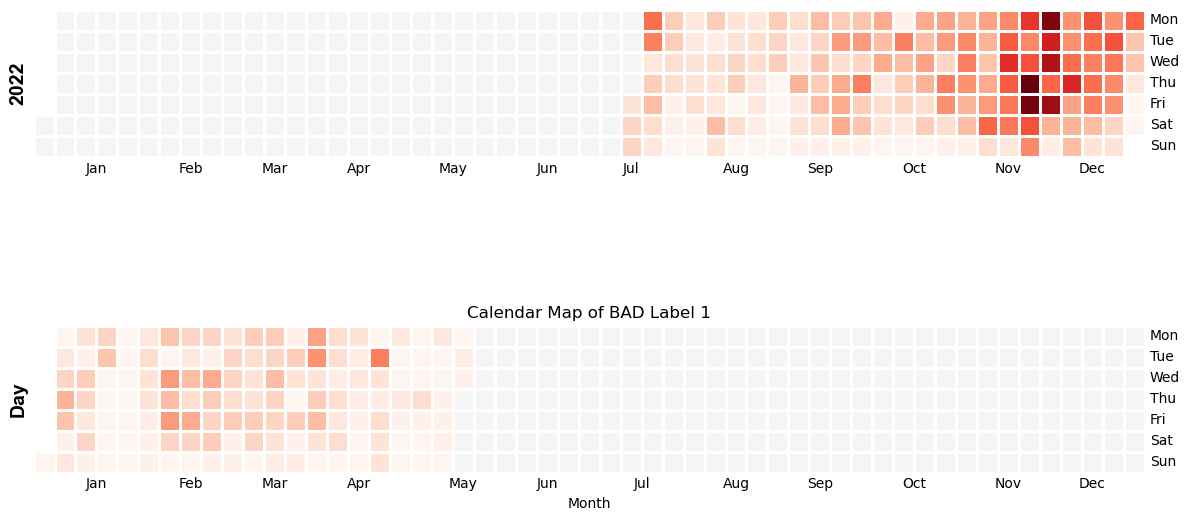

In [33]:
import calmap

# Filter the data for rows where the 'BAD' label is 1
filtered_data = df[df['BAD'] == 1]

# Convert the 'created_date' column to datetime
filtered_data['created_date'] = pd.to_datetime(filtered_data['created_date'])

# Set 'created_date' as the index
filtered_data.set_index('created_date', inplace=True)

# Create a calendar map
calmap.calendarplot(filtered_data['BAD'], fig_kws={'figsize': (12, 8)}, yearlabel_kws={'color':'black', 'fontsize':14})

# Customize the plot
plt.title('Calendar Map of BAD Label 1')
plt.xlabel('Month')
plt.ylabel('Day')
plt.show()


<Axes: xlabel='BAD', ylabel='year_month'>

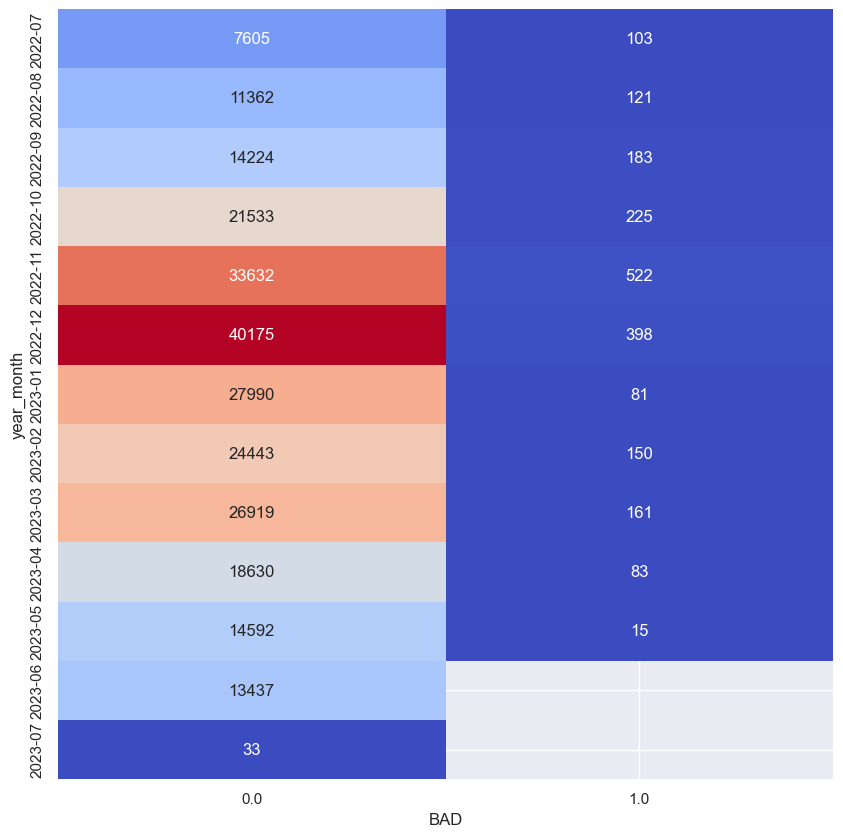

In [34]:
# Convert WEEK column to datetime
df['created_date'] = pd.to_datetime(df['created_date'])

# Create a year-month column
df['year_month'] = df['created_date'].dt.to_period('M')

# Group data by year-month and BAD columns
grouped = df.groupby(['year_month', 'BAD']).size().reset_index(name='count')

# Reshape the data
heatmap_data = grouped.pivot(index='year_month', columns='BAD', values='count')

# Create a calendar heat map
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g', cbar=False)

In [35]:
# Convert year_month to datetime format
df['year_month'] = df['year_month'].dt.to_timestamp()

# extract month from year_month
df['month_demand'] = df['year_month'].dt.month

# create season column based on month_demand
conditions = [        df['month_demand'].isin([5,6,7, 3 ]),
    df['month_demand'].between(8, 9),
    df['month_demand'].isin([10 , 11,12, 1, 2,4])
]

choices = ['high', 'low', 'normal']

df['season'] = np.select(conditions, choices)

# PCA Group Analysis

In [36]:
X = df.copy()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features = X.select_dtypes(['object']).columns.tolist()

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
# Define the columns for each cluster
customer_details_cols = ['gender', 'maritalStatus', 'jobType']
loan_details_cols = ['amount', 'season']
financial_cols = ['mainIncome', 'familyCosts', 'job_group']
region_cols = ['economic_region', 'population_region', 'disbursementType']

# Define the number of clusters for each set of columns
customer_details_clusters = 4
loan_details_clusters = 4
financial_clusters = 4
region_clusters = 4

In [39]:
def cluster_columns(columns, X, n_clusters):
    # Filter the dataframe to include only the specified columns
    X_filtered = X[columns]

    # Get list of numeric and categorical features
    numeric_features = X_filtered.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X_filtered.select_dtypes(include=['object', 'category']).columns.tolist()

    # Define the preprocessing pipeline for numeric columns
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Define the preprocessing pipeline for categorical columns
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Define the preprocessing column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Perform TruncatedSVD on the preprocessed data, limiting to 2 components
    svd = TruncatedSVD(n_components=2)
    X_svd = svd.fit_transform(preprocessor.fit_transform(X_filtered))

    # Fit the KMeans model on the SVD-transformed data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_svd)

    return cluster_labels

# Apply the clustering function to each list of columns with the predetermined number of clusters
customer_details_labels = cluster_columns(customer_details_cols, X, customer_details_clusters)
loan_details_labels = cluster_columns(loan_details_cols, X, loan_details_clusters)
financial_labels = cluster_columns(financial_cols, X, financial_clusters)
region_labels = cluster_columns(region_cols, X, region_clusters)

# Add the cluster labels to the original dataframe
X['customer_details_cluster'] = customer_details_labels
X['loan_details_cluster'] = loan_details_labels
X['financial_cluster'] = financial_labels
X['region_cluster'] = region_labels

In [40]:
df = X
# Create a list of column names to convert to string
columns_to_convert = ['region_cluster', 'financial_cluster', 'loan_details_cluster', 'customer_details_cluster']

# Convert the columns to string data type
df[columns_to_convert] = df[columns_to_convert].astype(str)

## Features Correlations

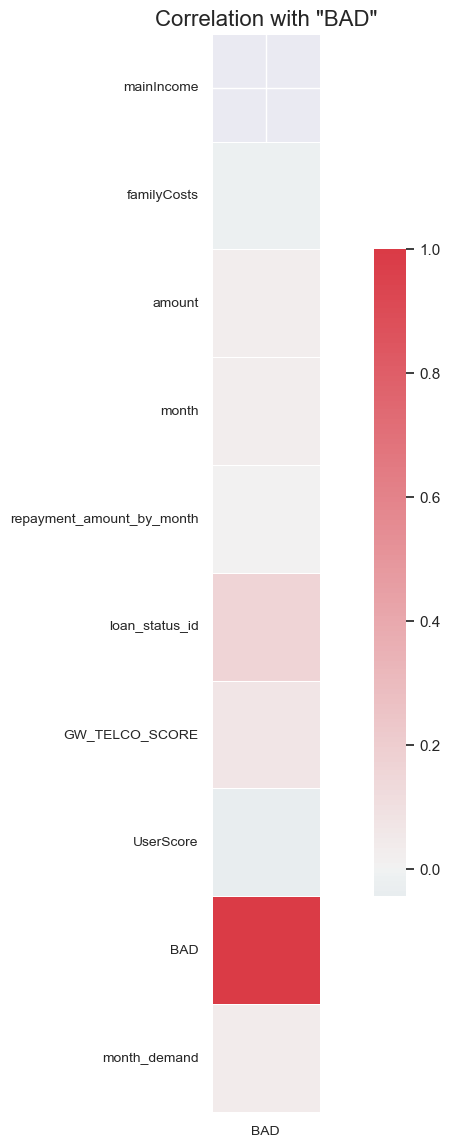

In [41]:
corr = df.corr()
corr_bad = corr['BAD']

mask = np.triu(np.ones_like(corr_bad.to_frame(), dtype=bool))

plt.figure(figsize=(14, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_bad.to_frame(), cmap=cmap, mask=mask, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.6})

plt.title('Correlation with "BAD"', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [42]:
fraudulent_data = df[df['BAD'] == 1]
non_fraudulent_data = df[df['BAD'] == 0]

In [43]:
fraudulent_stats = fraudulent_data.describe()
non_fraudulent_stats = non_fraudulent_data.describe()

In [44]:
# Dropping unnecessary columnss
df = df.drop(['FPD1','FPD1_OBS',
              'FPD5','FPD5_OBS',
              'FPD10','FPD10_OBS',
              'FPD30',	'FPD30_OBS',
              'DEL30MOB4_BASE', 'DEL30MOB4_HIS',
              'TPD30_OBS','TPD30','SPD30_OBS','SPD30',
              'FS_PD30_OBS', 'FPD30_OBS'], axis=1)

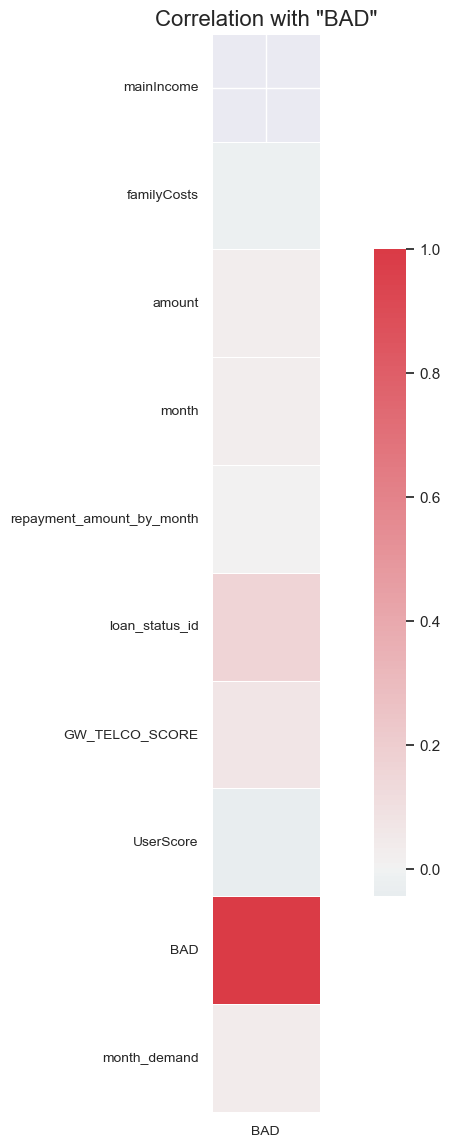

In [45]:
corr = df.corr()
corr_bad = corr['BAD']

mask = np.triu(np.ones_like(corr_bad.to_frame(), dtype=bool))

plt.figure(figsize=(14, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_bad.to_frame(), cmap=cmap, mask=mask, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.6})

plt.title('Correlation with "BAD"', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

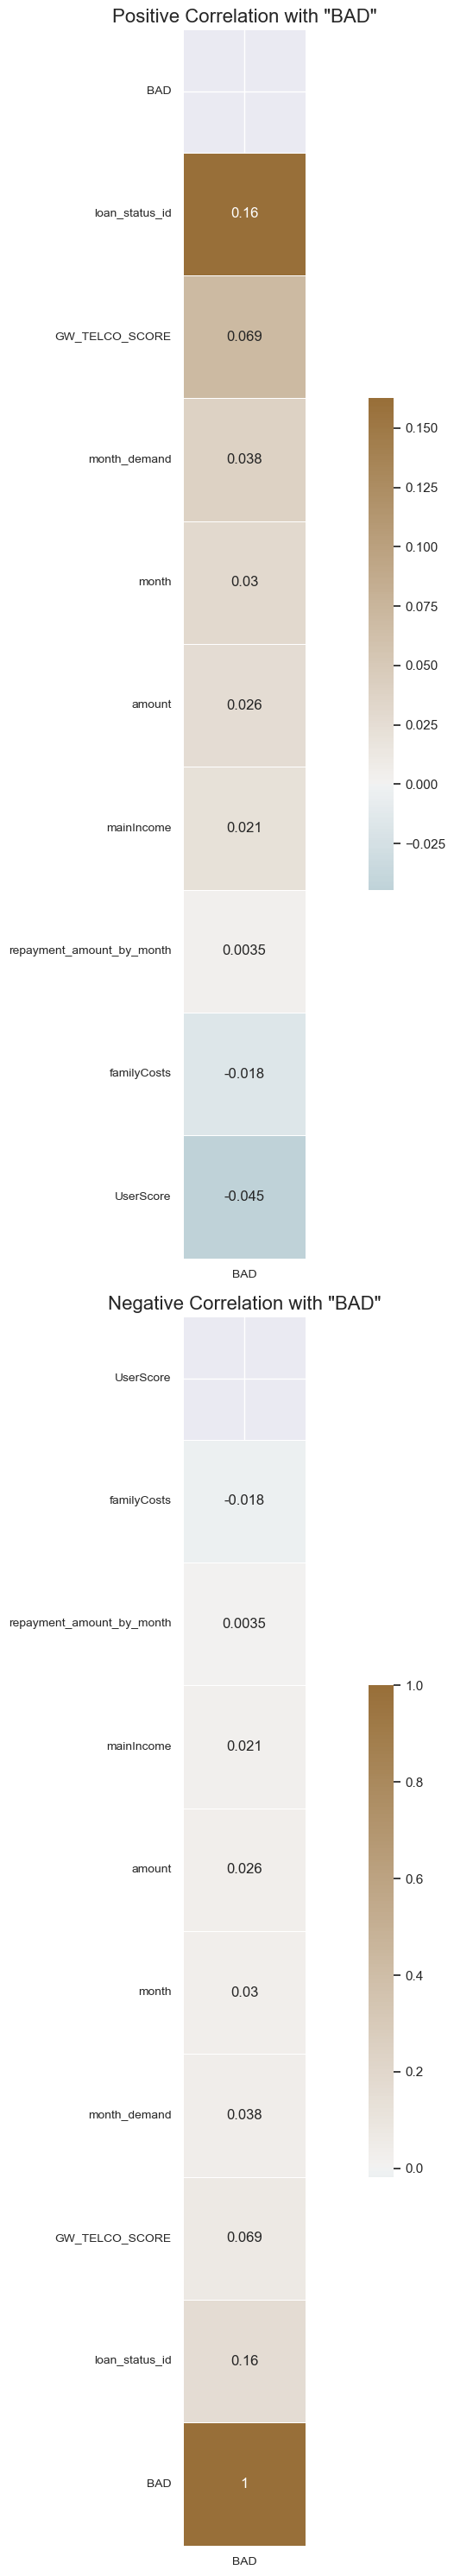

In [46]:
corr = df.corr()

# Positive correlation with target variable
pos_corr_bad = corr['BAD'].sort_values(ascending=False)[:30]
# Negative correlation with target variable
neg_corr_bad = corr['BAD'].sort_values(ascending=True)[:30]

# Create mask for each correlation
pos_mask = np.triu(np.ones_like(pos_corr_bad.to_frame(), dtype=bool))
neg_mask = np.triu(np.ones_like(neg_corr_bad.to_frame(), dtype=bool))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 30))

cmap = sns.diverging_palette(220, 50, as_cmap=True)

sns.heatmap(pos_corr_bad.to_frame(), annot=True, cmap=cmap, mask=pos_mask, center=0, square=True, linewidths=0.7, cbar_kws={"shrink": 0.4}, ax=ax1)
ax1.set_title('Positive Correlation with "BAD"', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=10)

sns.heatmap(neg_corr_bad.to_frame(), annot=True, cmap=cmap, mask=neg_mask, center=0, square=True, linewidths=0.7, cbar_kws={"shrink": 0.4}, ax=ax2)
ax2.set_title('Negative Correlation with "BAD"', fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=10)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=10)

plt.tight_layout()
plt.show()


BAD and NON-BAD

In [47]:
# Convert the 'MONTH' column to datetime if it's not already
df['created_date'] = pd.to_datetime(df['created_date'])

# Split the DataFrame based on the date
before_2022_12 = df[df['created_date'] < '2022-12']
out_of_time_sample = df[(df['created_date'] >= '2022-12') & (df['created_date'] <= '2023-06')]

In [48]:
# # Split Train - Test
loan_data_train = out_of_time_sample.copy()
loan_data_test = before_2022_12.copy()

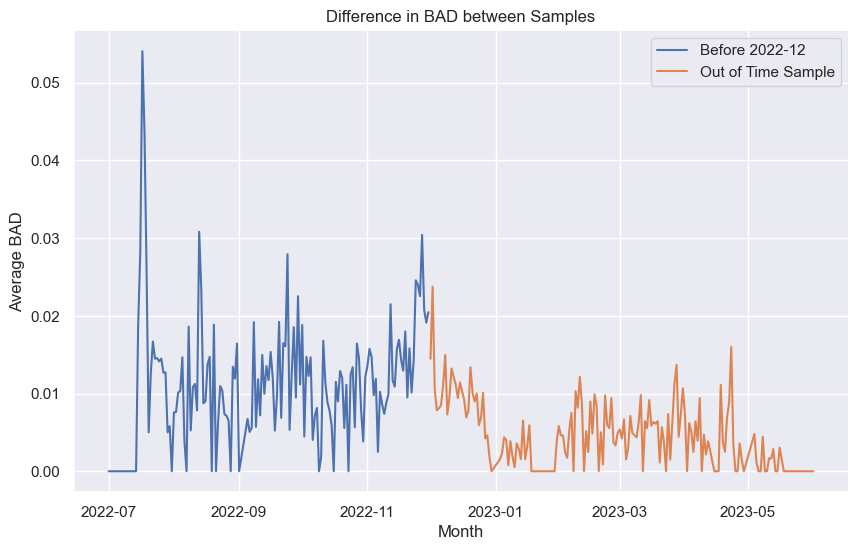

In [49]:
# Calculate the monthly average of the 'BAD' column for each sample
before_2022_12_avg = before_2022_12.groupby('created_date')['BAD'].mean()
out_of_time_sample_avg = out_of_time_sample.groupby('created_date')['BAD'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(before_2022_12_avg.index, before_2022_12_avg, label='Before 2022-12')
plt.plot(out_of_time_sample_avg.index, out_of_time_sample_avg, label='Out of Time Sample')
plt.xlabel('Month')
plt.ylabel('Average BAD')
plt.title('Difference in BAD between Samples')
plt.legend()
plt.show()

In [50]:
fraudulent_data = df[df['BAD'] == 1]
non_fraudulent_data = df[df['BAD'] == 0]

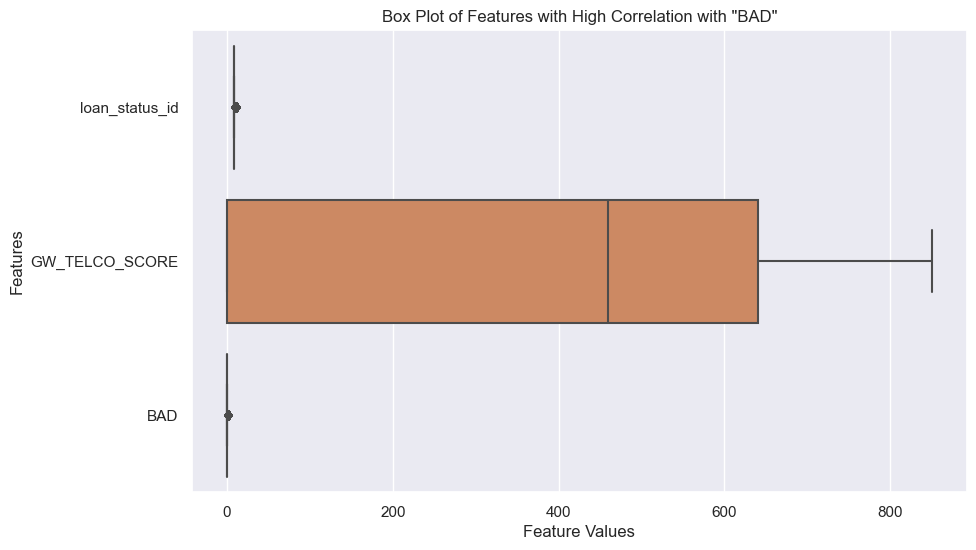

In [51]:
# Identify features with high correlation with "BAD"
high_corr_features = corr_bad[corr_bad.abs() > 0.05].index

# Filter the dataset to include only the high correlation features and the "BAD" column
data_subset = df[high_corr_features].copy()
data_subset['BAD'] = df['BAD']

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_subset, orient='h')
plt.title('Box Plot of Features with High Correlation with "BAD"')
plt.xlabel('Feature Values')
plt.ylabel('Features')
plt.show()

In [52]:
fraudulent_stats = fraudulent_data.describe()
non_fraudulent_stats = non_fraudulent_data.describe()

# Extract specific statistics for comparison
fraudulent_stats = fraudulent_stats.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
non_fraudulent_stats = non_fraudulent_stats.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Rename the index to distinguish between fraudulent and non-fraudulent data
fraudulent_stats.rename(index=lambda x: 'fraudulent_' + x, inplace=True)
non_fraudulent_stats.rename(index=lambda x: 'non_fraudulent_' + x, inplace=True)

# Concatenate the statistics into a single dataframe for comparison
comparison_stats = pd.concat([fraudulent_stats, non_fraudulent_stats], axis=0)

# Print the comparison statistics
#print(comparison_stats)

In [53]:
comparison_stats

,mainIncome,familyCosts,amount,month,repayment_amount_by_month,loan_status_id,GW_TELCO_SCORE,UserScore,BAD,month_demand
fraudulent_mean,1.425978e+07,2.543929e+06,2.444172e+07,22.519099,1.629992e+06,10.023017,587.766895,589.231672,1.0,8.508815
fraudulent_std,4.925081e+06,1.713095e+06,1.299198e+07,8.976799,5.533678e+05,0.149993,222.315135,11.107685,0.0,3.608766
fraudulent_min,4.000000e+06,0.000000e+00,3.000000e+06,3.000000,5.320000e+05,10.000000,0.000000,570.701157,1.0,1.000000
fraudulent_25%,1.050000e+07,1.000000e+06,2.000000e+07,12.000000,1.292000e+06,10.000000,593.000000,579.495607,1.0,7.000000
fraudulent_50%,1.500000e+07,2.000000e+06,2.000000e+07,24.000000,1.292000e+06,10.000000,651.500000,587.624805,1.0,10.000000
fraudulent_75%,1.600000e+07,3.000000e+06,2.000000e+07,24.000000,2.122000e+06,10.000000,707.000000,597.854761,1.0,11.000000
fraudulent_max,1.000000e+08,1.800000e+07,5.000000e+07,36.000000,5.012000e+06,11.000000,850.000000,618.135889,1.0,12.000000
non_fraudulent_mean,1.295407e+07,3.056907e+06,2.131000e+07,19.672796,1.607304e+06,8.439454,342.025867,595.027081,0.0,6.777944
non_fraudulent_std,5.585198e+06,2.567077e+06,1.067383e+07,8.450010,5.771812e+05,0.857524,317.574712,11.562899,0.0,4.003779
non_fraudulent_min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,8.000000,0.000000,0.000000,0.0,1.000000


In [54]:
from sklearn.preprocessing import FunctionTransformer

# Define a function to apply logarithmic transformation
def apply_log_transformation(x):
    return np.log(x)

# Select the numeric columns
numeric_cols = df.select_dtypes(['float', 'int']).columns

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('numeric_transformer', FunctionTransformer(apply_log_transformation), numeric_cols)
    ], remainder='passthrough'))
])

# Apply the pipeline to the data
transformed_data = pipeline.fit_transform(df)

# Weight of Evidence

## Function definitions

In [55]:
def woe_discrete(df_input, variable_name):
    df = df_input[[variable_name, 'BAD']]
    df = pd.concat([df.groupby(variable_name, as_index = False)['BAD'].count(),
                    df.groupby(variable_name, as_index = False)['BAD'].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [variable_name, 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE']).reset_index(drop = True)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    if (df['IV'][0] == -np.inf) or (df['IV'][0] == np.inf):
        extreme = set(df[(df['WoE'] > -np.inf) & (df['WoE'] < np.inf)][variable_name])
        df_input_new = df_input[df_input[variable_name].isin(extreme)]
        df['IV_adjusted'] = woe_discrete(df_input_new, variable_name)['IV'][0]
    else:
        df['IV_adjusted'] = df['IV']
        
    return df

In [56]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels=30, figsize=(10, 5)):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    colors = ['red' if val < 0 else 'green' for val in y]  # Assign red color for negative values and green for positive values
    plt.figure(figsize=figsize)
    plt.plot(x, y, marker='o', linestyle='--', color='b', mec='black', mew=1, ms=6)  # Set line color to blue, marker edge color to black, and marker size to 6
    plt.axhline(0, color='k', linestyle='--')  # Add a horizontal line at y=0 for reference
    var_name = df_WoE.columns[0]
    var_IV = df_WoE['IV_adjusted'][0]
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence by ' + var_name + ' (IV = ' + str(round(var_IV, 5)) + ')')
    plt.xticks(rotation=rotation_of_x_axis_labels, ha='right')
    plt.subplots_adjust(bottom=0.15)
    
    # Customize legend colors
    handles = [plt.Line2D([], [], marker='o', linestyle='--', color='k', markersize=6),
               plt.Line2D([], [], marker='o', linestyle='--', color='b', mec='black', mew=1, ms=6, markerfacecolor='none')]
    labels = ['y = 0', 'Weight of Evidence']
    plt.legend(handles, labels, loc='best')
    
    # Set custom colors for markers
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.plot(xi, yi, marker='o', color=colors[i], mec='black', mew=1, ms=6)
    
    plt.show()

## Discrete variables

In [57]:
# Object columns
columns_obj = loan_data.select_dtypes(['object']).columns
columns_obj

Index(['vnpostProvinceName', 'vnpostDistrictName', 'vnpostOrganizationName',
       'vnpostLevel', 'vnpostUserName', 'EmployeeType', 'gender', 'email',
       'jobType', 'purpose', 'maritalStatus', 'cityTerm', 'cityPermanent',
       'bank', 'i_sent_partner', 'loanCode', 'partner', 'product',
       'disbursementType', 'loan_status', 'reason', 'createDevice',
       'submitDevice', 'outSideApp', 'idTrigger', 'phoneTrigger',
       'userTrigger', 'userTriggerNew', 'createTimeTrigger', 'csTokenTrigger',
       'emailTrigger', 'addressTrigger', 'deviceTokenTrigger', 'FPD1',
       'FPD1_OBS', 'FPD5', 'FPD5_OBS', 'FPD10', 'FPD10_OBS', 'FPD30',
       'FPD30_OBS', 'FS_PD30_OBS', 'FST_PD30_OBS', 'SPD30', 'SPD30_OBS',
       'TPD30', 'TPD30_OBS', 'DEL30MOB4_HIS', 'DEL30MOB4_BASE',
       'cityTerm_economic_region', 'cityPermanent_economic_region',
       'ScoreGroup', 'economic_region', 'population_region', 'job_group',
       'marital_group', 'economic_group', 'season'],
      dtype='object'

In [58]:
import math
discrete_cols = ['vnpostProvinceName', 'vnpostDistrictName', 'vnpostOrganizationName',
       'vnpostLevel', 'vnpostUserName', 'EmployeeType', 'gender', 'email',
       'jobType', 'purpose', 'maritalStatus', 'cityTerm', 'cityPermanent',
       'bank', 'i_sent_partner', 'partner', 'product',
       'disbursementType', 'loan_status', 'reason', 'createDevice',
       'submitDevice', 'outSideApp', 'idTrigger', 'phoneTrigger',
       'userTrigger', 'userTriggerNew', 'createTimeTrigger', 'csTokenTrigger',
       'emailTrigger', 'addressTrigger', 'deviceTokenTrigger',
       'cityTerm_economic_region', 'cityPermanent_economic_region',
       'ScoreGroup', 'economic_region', 'population_region', 'job_group',
       'marital_group', 'economic_group', 'season']
df_discrete = pd.DataFrame(discrete_cols).rename(columns = {0:'DISCRETE_COL'})
df_discrete['DISTINCT'], df_discrete['IV'], df_discrete['IV_ADJUSTED'] = '', '', ''
for i in range(len(df_discrete)):
    col = df_discrete['DISCRETE_COL'][i]
    results = woe_discrete(loan_data, col)
    df_discrete['DISTINCT'][i] = len(results)
    df_discrete['IV'][i] = results['IV'][0]
    df_discrete['IV_ADJUSTED'][i] = results['IV_adjusted'][0]
    print(col, 'done!')
df_discrete = df_discrete.sort_values(['IV_ADJUSTED', 'IV', 'DISTINCT'], ascending = [False, True, True]).reset_index(drop = True)
df_discrete

vnpostProvinceName done!
vnpostDistrictName done!
vnpostOrganizationName done!
vnpostLevel done!
vnpostUserName done!
EmployeeType done!
gender done!
email done!
jobType done!
purpose done!
maritalStatus done!
cityTerm done!
cityPermanent done!
bank done!
i_sent_partner done!
partner done!
product done!
disbursementType done!
loan_status done!
reason done!
createDevice done!
submitDevice done!
outSideApp done!
idTrigger done!
phoneTrigger done!
userTrigger done!
userTriggerNew done!
createTimeTrigger done!
csTokenTrigger done!
emailTrigger done!
addressTrigger done!
deviceTokenTrigger done!
cityTerm_economic_region done!
cityPermanent_economic_region done!
ScoreGroup done!
economic_region done!
population_region done!
job_group done!
marital_group done!
economic_group done!
season done!


,DISCRETE_COL,DISTINCT,IV,IV_ADJUSTED
0,email,120699,inf,1.583193
1,vnpostUserName,6425,inf,0.904901
2,vnpostOrganizationName,3629,inf,0.785432
3,vnpostDistrictName,640,inf,0.616944
4,jobType,43,inf,0.451188
5,job_group,2,0.419016,0.419016
6,vnpostProvinceName,64,inf,0.324293
7,cityTerm,64,inf,0.28203
8,bank,50,inf,0.261256
9,ScoreGroup,8,inf,0.255077


In [59]:
# Filter columns based on DISTINCT and IV_ADJUSTED
selected_discrete_cols = []
for i in range(len(df_discrete)):
    if df_discrete['IV_ADJUSTED'][i] > 0.2 and df_discrete['DISTINCT'][i] < 20:
        selected_discrete_cols.append(df_discrete['DISCRETE_COL'][i])


print('Selected discrete columns:', selected_discrete_cols)

Selected discrete columns: ['job_group', 'ScoreGroup']


## Discretize the continuous

In [60]:
# Continuous columns
columns_num = loan_data.select_dtypes(['float', 'int']).columns
columns_num

Index(['mainIncome', 'familyCosts', 'amount', 'month',
       'repayment_amount_by_month', 'loan_status_id', 'GW_TELCO_SCORE',
       'UserScore', 'BAD', 'month_demand'],
      dtype='object')

In [61]:
def woe_continuous_best_class_count(df_input, variable_name, class_count_bounds = [5, 6]):
    candidate_class_counts = list(range(class_count_bounds[0], class_count_bounds[1]))

    # Generate bins for each candidate class count
    candidate_bins = [pd.qcut(df_input[variable_name], q=count, duplicates='drop', retbins=True) 
                      for count in candidate_class_counts]

    # Calculate WoE and IV for each binning scheme
    IV_adjusted_list = [woe_discrete(pd.DataFrame({variable_name: bins[0], 'BAD': df_input['BAD']}), variable_name)['IV_adjusted'][0] 
                        for bins in candidate_bins]

    # Find best class count
    best_cut = candidate_class_counts[IV_adjusted_list.index(max(IV_adjusted_list))]

    return [best_cut, woe_discrete(pd.DataFrame({variable_name: candidate_bins[best_cut-class_count_bounds[0]][0], 'BAD': df_input['BAD']}), variable_name), candidate_bins[best_cut-class_count_bounds[0]][1]]

In [62]:
# Manipulation with continuous variables
pd.options.display.max_rows = None
continuous_cols = [col for col in columns_num if col not in ['personalID', 'oldPersonalID','bank_account_number', 'i_sent_partner',
       'autoRejectApp', 'loan_status_id','FPD1', 'FPD1_OBS', 'FPD5',
       'FPD5_OBS', 'FPD10', 'FPD10_OBS', 'FPD30', 'FPD30_OBS', 'FS_PD30',
       'FS_PD30_OBS', 'FST_PD30', 'FST_PD30_OBS', 'SPD30', 'SPD30_OBS','FS_PD30',
       'TPD30', 'TPD30_OBS', 'DEL30MOB4_HIS', 'DEL30MOB4_BASE', 'BAD', 'month_demand','cus_partner_rate','UserScore']]

df_continuous = pd.DataFrame(continuous_cols).rename(columns = {0:'CONTINUOUS_COL'})
df_continuous['BEST_CUT'], df_continuous['IV'], df_continuous['IV_ADJUSTED'], df_continuous['BINS'] = '', '', '', ''
for i in range(len(df_continuous)):
    col = df_continuous['CONTINUOUS_COL'][i]
    if loan_data[col].max() < 1:
        loan_data[col] = loan_data[col] * 100
    results = woe_continuous_best_class_count(loan_data, col)
    df_continuous.at[i, 'BEST_CUT'] = results[0]
    df_continuous.at[i, 'IV'] = results[1]['IV'][0]
    df_continuous.at[i, 'IV_ADJUSTED'] = results[1]['IV_adjusted'][0]
    df_continuous.at[i, 'BINS'] = results[2]
    print(col, 'done!')

df_continuous = df_continuous.sort_values(['IV_ADJUSTED', 'IV', 'BEST_CUT'], ascending = [False, True, True]).reset_index(drop = True)
df_continuous

mainIncome done!
familyCosts done!
amount done!
month done!
repayment_amount_by_month done!
GW_TELCO_SCORE done!


,CONTINUOUS_COL,BEST_CUT,IV,IV_ADJUSTED,BINS
0,GW_TELCO_SCORE,5,0.865443,0.865443,"[0.0, 560.0, 668.0, 850.0]"
1,mainIncome,5,0.160721,0.160721,"[10.0, 9000000.0, 10000000.0, 13500000.0, 1500..."
2,familyCosts,5,0.14863,0.14863,"[0.0, 1500000.0, 2000000.0, 3000000.0, 4000000..."
3,repayment_amount_by_month,5,0.112876,0.112876,"[0.0, 1102000.0, 1292000.0, 1562000.0, 2122000..."
4,month,5,0.094065,0.094065,"[0.0, 12.0, 24.0, 36.0]"
5,amount,5,0.041599,0.041599,"[0.0, 15000000.0, 20000000.0, 50000000.0]"


mainIncome binned!
familyCosts binned!
repayment_amount_by_month binned!


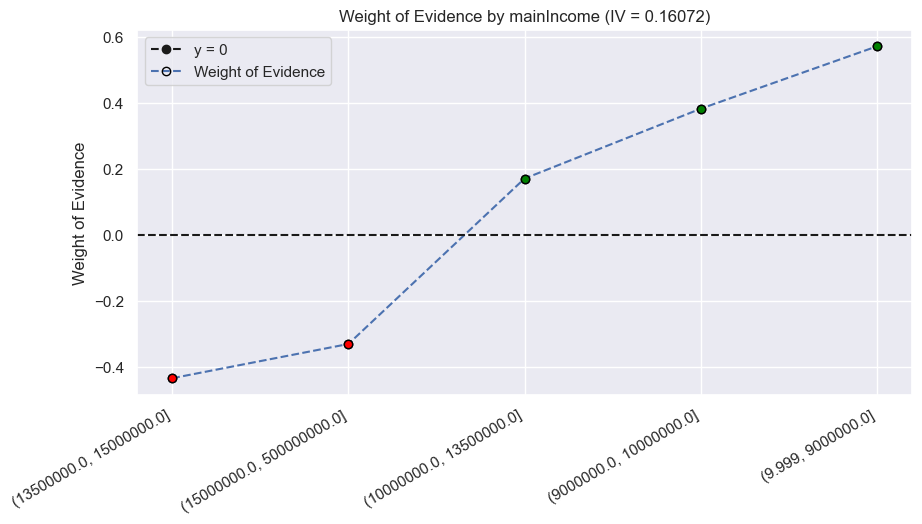

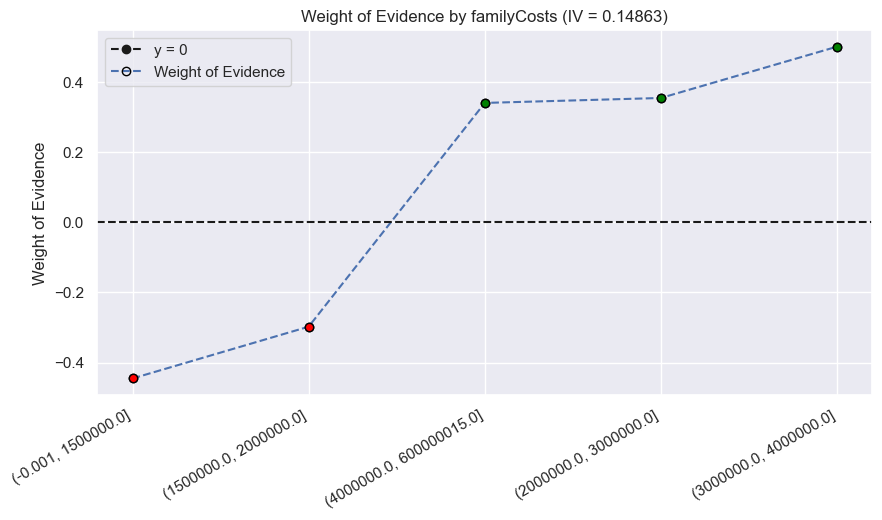

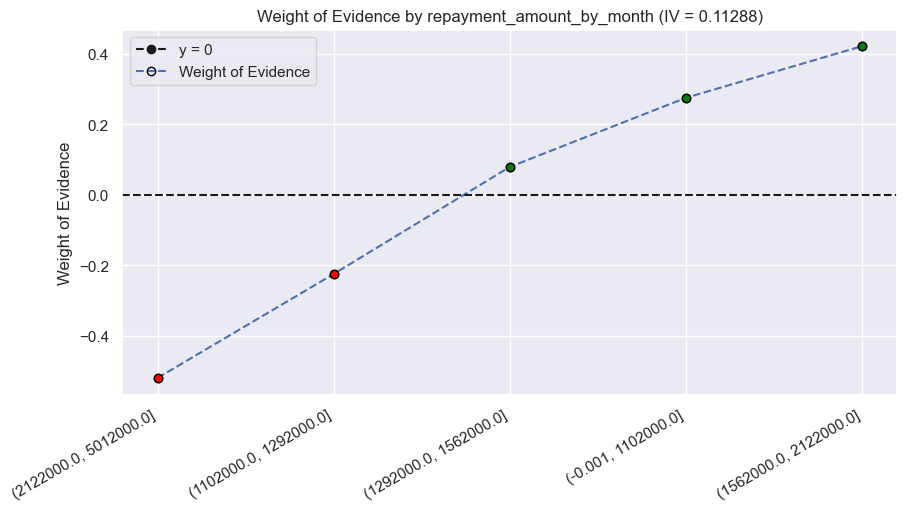

In [63]:
df_continuous_IV_gt_02 = df_continuous[(df_continuous['IV_ADJUSTED'] > 0.1) & (df_continuous['IV_ADJUSTED'] < 0.5)]

for i in range(len(df_continuous_IV_gt_02)):
    col = df_continuous_IV_gt_02.iloc[i]['CONTINUOUS_COL']
    bins = df_continuous_IV_gt_02.iloc[i]['BINS']
    loan_data[col + '_bin'] = pd.cut(loan_data[col], bins)
    print(col, 'binned!')

for col in df_continuous_IV_gt_02['CONTINUOUS_COL']:
    results = woe_continuous_best_class_count(loan_data, col)
    woe_results = results[1]
    plot_by_woe(woe_results)

In [64]:
woe_continuous_best_class_count(loan_data, 'repayment_amount_by_month')

[5,
   repayment_amount_by_month  n_obs  prop_bad  prop_n_obs  n_bad   n_good  \
 0    (2122000.0, 5012000.0]  30449  0.013301    0.118655  405.0  30044.0   
 1    (1102000.0, 1292000.0]  74747  0.009940    0.291278  743.0  74004.0   
 2    (1292000.0, 1562000.0]  27729  0.007357    0.108056  204.0  27525.0   
 3       (-0.001, 1102000.0]  51685  0.006056    0.201409  313.0  51372.0   
 4    (1562000.0, 2122000.0]  72007  0.005236    0.280601  377.0  71630.0   
 
    prop_n_bad  prop_n_good       WoE        IV  IV_adjusted  
 0    0.198335     0.118016 -0.519135  0.112876     0.112876  
 1    0.363859     0.290696 -0.224487  0.112876     0.112876  
 2    0.099902     0.108121  0.079064  0.112876     0.112876  
 3    0.153281     0.201795  0.274980  0.112876     0.112876  
 4    0.184623     0.281371  0.421358  0.112876     0.112876  ,
 array([      0., 1102000., 1292000., 1562000., 2122000., 5012000.])]

In [65]:
selected_continuous_cols1 = df_continuous_IV_gt_02['CONTINUOUS_COL'].tolist()
selected_continuous_cols1 = [x + '_bin' for x in selected_continuous_cols1]
selected_continuous_cols1

['mainIncome_bin', 'familyCosts_bin', 'repayment_amount_by_month_bin']

In [66]:
selected_continuous_cols = selected_continuous_cols1
selected_continuous_cols

['mainIncome_bin', 'familyCosts_bin', 'repayment_amount_by_month_bin']

# Model Estimations

In [67]:
# Clean up data
discrete_cols = ['job_group', 'ScoreGroup','mainIncome_bin','familyCosts_bin','repayment_amount_by_month_bin']
# Characteristic variable isolation
# Fill 0
spe_num = loan_data.select_dtypes(['float', 'int']).columns
loan_data[spe_num] = loan_data[spe_num].apply(lambda x: x.fillna(0), axis=0)
# Fill missing values
spe_obj = loan_data.select_dtypes(['object']).columns
loan_data[spe_obj] = loan_data[spe_obj].apply(lambda x: x.fillna('NaN'), axis=0)

for col in discrete_cols:
    results = woe_discrete(loan_data, col)
    col_woe = col + '_WOE'
    loan_data[col_woe] = loan_data[col].map(results.set_index(col)['WoE'])

In [68]:
# Train/test split
category_columns = loan_data.select_dtypes(include='category')
category_columns = category_columns.columns
# Assuming your DataFrame is named 'df' and the column to convert is 'category_column'
loan_data[category_columns] = loan_data[category_columns].astype('object')

X = loan_data.filter(like='_WOE', axis = 1)
y = loan_data['BAD']
X = X.fillna(0)

ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.2, stratify = y, shuffle = True, random_state = 19)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (205293, 5)
X_test shape:  (51324, 5)
y_train shape:  (205293,)
y_test shape:  (51324,)


In [69]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBoostClassifier": XGBClassifier(),
    "BaggingClassifier": BaggingClassifier()
}

In [70]:
# Wow our scores are getting even high scores even when applying cross validation.
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 99.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 99.0 % accuracy score
Classifiers:  SVC Has a training score of 99.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 99.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 99.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 99.0 % accuracy score
Classifiers:  BaggingClassifier Has a training score of 99.0 % accuracy score


In [71]:
# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_
print('Best Estimator for Logistic Regression:', log_reg)

Best Estimator for Logistic Regression: LogisticRegression(C=0.001)


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

classifiers = [
    ("Logistic Regression", log_reg)
]

for classifier_name, classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    accuracy = round(scores.mean() * 100, 2)
    precision = round(precision_score(y_train, classifier.predict(X_train)) * 100, 2)
    recall = round(recall_score(y_train, classifier.predict(X_train)) * 100, 2)
    
    print(classifier_name + ":")
    print("  Accuracy:", str(accuracy) + "%")
    print("  Precision:", str(precision) + "%")
    print("  Recall:", str(recall) + "%")


Logistic Regression:
  Accuracy: 99.2%
  Precision: 0.0%
  Recall: 0.0%


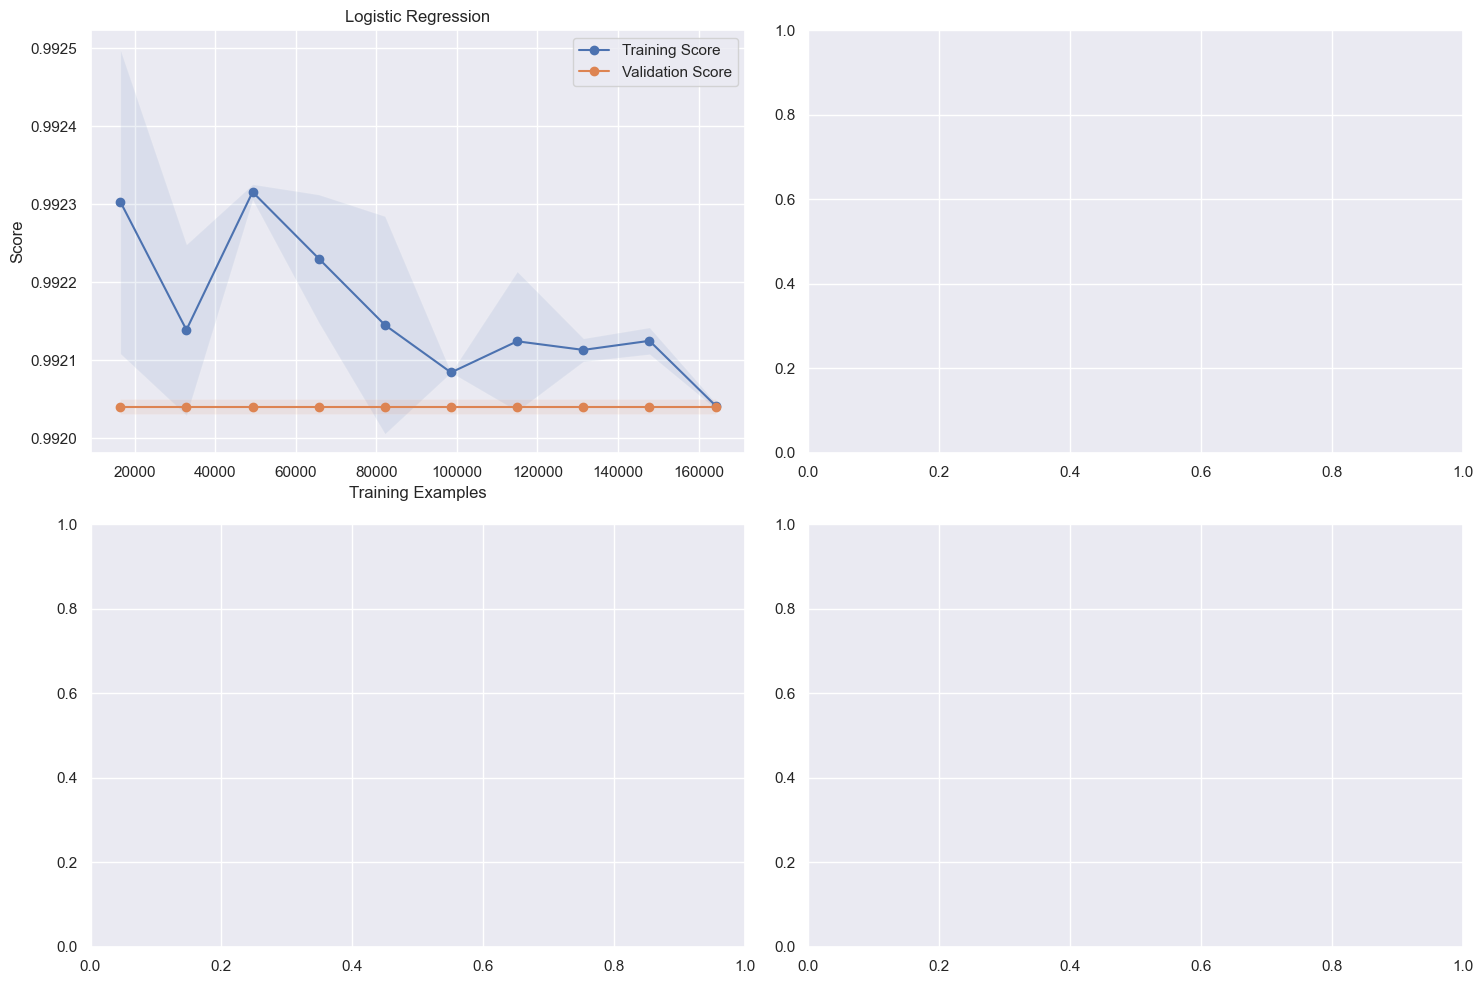

In [73]:
from sklearn.model_selection import learning_curve

# Define the classifiers
classifiers = {
    'Logistic Regression': log_reg
}

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, (name, clf) in enumerate(classifiers.items()):
    # Compute the learning curve
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    axs[i].plot(train_sizes, train_scores_mean, label='Training Score', marker='o')
    axs[i].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    axs[i].plot(train_sizes, test_scores_mean, label='Validation Score', marker='o')
    axs[i].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

    # Set the plot labels and title
    axs[i].set_title(name)
    axs[i].set_xlabel('Training Examples')
    axs[i].set_ylabel('Score')
    axs[i].legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()

In [74]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Create a DataFrame with all the scores and the classifiers names.
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

In [75]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))

Logistic Regression:  0.7313262461792714


In [76]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
from sklearn.metrics import precision_score,recall_score,f1_score

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# log_reg = LogisticRegression()  # Initialize a Logistic Regression model
undersample_X, undersample_y = rus.fit_resample(X_train, y_train)
# undersample_X, undersample_y = X_train, y_train  # Assuming undersample data comes from your train data

# StratifiedKFold with random_state
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

undersample_X = undersample_X.values
undersample_y = undersample_y.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
nearmiss = NearMiss()

# Set the random state of your Logistic Regression model
log_reg = LogisticRegression(random_state=42)  # Initialize a Logistic Regression model

# Cross Validating the right way
for train, test in sss.split(undersample_X, undersample_y):
    undersample_pipeline = imbalanced_make_pipeline(nearmiss, log_reg)  # NearMiss happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_X[train], undersample_y[train])
    undersample_prediction = undersample_model.predict(undersample_X[test])
    
    # ... rest of the code remains unchanged

    undersample_accuracy.append(undersample_pipeline.score(undersample_X[test], undersample_y[test]))
    undersample_precision.append(precision_score(undersample_y[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_y[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_y[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_y[test], undersample_prediction))

X_nearmiss, y_nearmiss = nearmiss.fit_resample(undersample_X, undersample_y)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

NearMiss Label Distribution: Counter({0.0: 1634, 1.0: 1634})


In [77]:
classifiers = [
    ("Logistic Regression", log_reg)
]

In [78]:
for classifier_name, classifier in classifiers:
    classifier.fit(X_nearmiss, y_nearmiss)
    training_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=5, scoring='precision')
    recall_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=5, scoring='recall')
    
    print(f"Classifier: {classifier_name}")
    print(f"  Accuracy: {round(training_scores.mean() * 100, 2)}%")
    print(f"  Precision: {round(precision_scores.mean() * 100, 2)}%")
    print(f"  Recall: {round(recall_scores.mean() * 100, 2)}%")
    print()


Classifier: Logistic Regression
  Accuracy: 65.67%
  Precision: 65.46%
  Recall: 66.47%



In [79]:
# Apply NearMiss to Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_nearmiss, y_nearmiss)
log_reg = grid_log_reg.best_estimator_
print('Best Estimator for Logistic Regression:', log_reg)


Best Estimator for Logistic Regression: LogisticRegression(C=0.01)


In [80]:
# Calculate classification report scores using NearMiss
y_pred_nearmiss = log_reg.predict(X_nearmiss)
log_reg_report = classification_report(y_nearmiss, y_pred_nearmiss, output_dict=True)

# Create a DataFrame to store the classification report scores
data = {
    'Classifier': ['Logistic Regression'],
    'Accuracy': [log_reg_report['accuracy']],
    'Precision': [log_reg_report['weighted avg']['precision']],
    'Recall': [log_reg_report['weighted avg']['recall']],
}

report_df = pd.DataFrame(data)
report_df

,Classifier,Accuracy,Precision,Recall
0,Logistic Regression,0.664627,0.664736,0.664627


In [81]:
# Create an empty DataFrame
roc_df_nearmiss = pd.DataFrame(columns=['Classifier', 'ROC AUC'])

# Perform cross-validation predictions using NearMiss
log_reg_pred = cross_val_predict(log_reg, X_nearmiss, y_nearmiss, cv=5, method="decision_function")

# Calculate and append ROC AUC scores to the DataFrame
roc_df_nearmiss = roc_df_nearmiss.append({'Classifier': 'Logistic Regression', 'ROC AUC': roc_auc_score(y_nearmiss, log_reg_pred)}, ignore_index=True)
# Print the DataFrame
roc_df_nearmiss

,Classifier,ROC AUC
0,Logistic Regression,0.726969


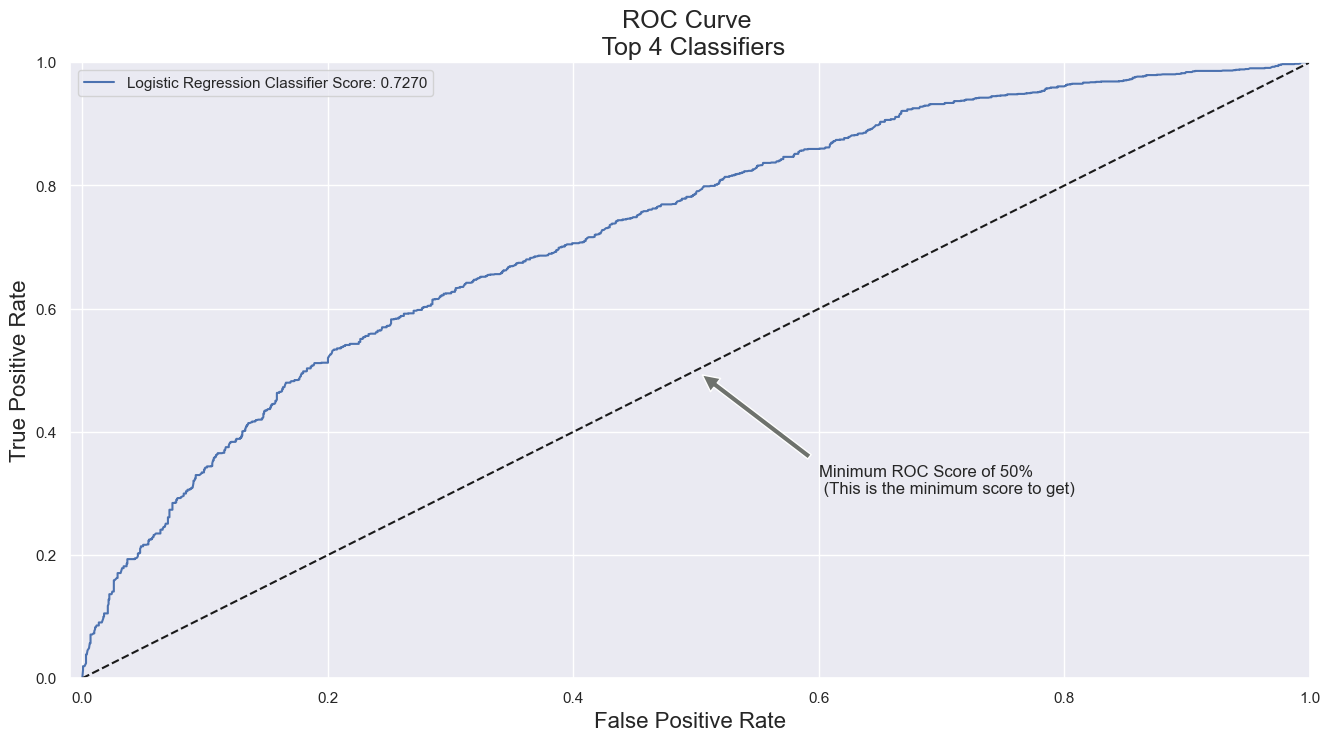

In [82]:
# Calculate ROC curves and scores
log_fpr, log_tpr, log_threshold = roc_curve(y_nearmiss, log_reg_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_nearmiss, log_reg_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

# Display the ROC curve
graph_roc_curve_multiple(log_fpr, log_tpr)
plt.show()

In [83]:
# Calculate evaluation metrics for the undersampling technique
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []

for train, test in sss.split(undersample_X, undersample_y):
    undersample_pipeline = imbalanced_make_pipeline(nearmiss, log_reg)
    undersample_model = undersample_pipeline.fit(undersample_X[train], undersample_y[train])
    undersample_prediction = undersample_model.predict(undersample_X[test])
    
    undersample_accuracy.append(accuracy_score(undersample_y[test], undersample_prediction))
    undersample_precision.append(precision_score(undersample_y[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_y[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_y[test], undersample_prediction))

# Calculate evaluation metrics for overfitting (without undersampling)
y_pred = log_reg.predict(X_train)
overfitting_recall = recall_score(y_train, y_pred)
overfitting_precision = precision_score(y_train, y_pred)
overfitting_f1 = f1_score(y_train, y_pred)
overfitting_accuracy = accuracy_score(y_train, y_pred)

# Create a DataFrame for the results
temp_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Undersampling Technique': [np.mean(undersample_accuracy), np.mean(undersample_precision),
                                 np.mean(undersample_recall), np.mean(undersample_f1)],
    'Original (without Undersampling)': [overfitting_accuracy, overfitting_precision,
                                             overfitting_recall, overfitting_f1]
})

# Print the DataFrame
temp_df

,Metric,Undersampling Technique,Original (without Undersampling)
0,Accuracy,0.665242,0.650797
1,Precision,0.661561,0.015331
2,Recall,0.678100,0.678091
3,F1 Score,0.669530,0.029984


In [84]:
X.head()

,job_group_WOE,ScoreGroup_WOE,mainIncome_bin_WOE,familyCosts_bin_WOE,repayment_amount_by_month_bin_WOE
0,1.049622,0.791303,0.382184,0.354571,0.421370
1,1.049622,0.791303,-0.435478,0.354571,0.274933
2,1.049622,0.791303,-0.331635,0.340451,-0.224476
3,1.049622,0.599228,0.170310,-0.445787,-0.224476
4,1.049622,0.791303,0.571345,0.501096,0.079076


In [85]:
# Logistic Regression with Under-Sampling
beta_coeffs_undersample = log_reg.coef_
data_undersample = {'Feature': X.columns, 'Beta Coefficient (Under-Sampling)': beta_coeffs_undersample[0]}
df_undersample = pd.DataFrame(data_undersample)

In [86]:
print("Beta Coefficients (Logistic Regression with Under-Sampling):")
df_undersample

Beta Coefficients (Logistic Regression with Under-Sampling):


,Feature,Beta Coefficient (Under-Sampling)
0,job_group_WOE,-0.671228
1,ScoreGroup_WOE,-0.440524
2,mainIncome_bin_WOE,-0.357116
3,familyCosts_bin_WOE,-0.351809
4,repayment_amount_by_month_bin_WOE,-0.232968


In [87]:
intercept  = log_reg.intercept_[0]
intercept

0.003123168287415627

In [88]:
selected_cols = X.columns

In [89]:
# Convert selected columns to string data type
loan_data[selected_cols] = loan_data[selected_cols].astype(str)

# Fill NaN values with the least popular category in each column
for col in selected_cols:
    least_popular = loan_data[col].value_counts().idxmin()  # Get the least popular category
    loan_data[col].fillna(least_popular, inplace=True)

In [90]:
def calculate_logistic_predictions(dataset, beta_coefficients, intercept):
    """
    Calculate the logistic predictions for a given dataset using the provided beta coefficients and intercept.

    Parameters:
    - dataset: A numpy array or pandas DataFrame containing the feature values. Each row represents an individual, and each column represents a feature.
    - beta_coefficients: A numpy array or list containing the beta coefficients for each feature.
    - intercept: The intercept (alpha) value.

    Returns:
    - A numpy array containing the logistic predictions for each individual in the dataset.
    """
    if isinstance(beta_coefficients, list):
        beta_coefficients = np.array(beta_coefficients)

    linear_combination = np.dot(dataset, beta_coefficients) + intercept
    probabilities = 1 / (1 + np.exp(-linear_combination))
    return probabilities

# Example usage:
# Assuming you have your logistic regression model log_reg and dataset X
# You can get the beta coefficients and intercept as follows:
beta_coefficients = log_reg.coef_[0]  # Extracting the 1D array from the 2D array
intercept = log_reg.intercept_

# Now you can call the function with the provided dataset and the extracted coefficients and intercept:
predictions = calculate_logistic_predictions(X, beta_coefficients, intercept)
print(predictions)

[0.19633021 0.2528867  0.26912913 ... 0.27648567 0.22914613 0.28373585]


In [91]:
def evaluate_threshold(predictions, y, threshold_range):
    """
    Evaluate logistic predictions using different threshold values and compare with the actual labels (ground truth).

    Parameters:
    - predictions: A numpy array containing the logistic predictions.
    - y: A numpy array containing the actual labels (ground truth).
    - threshold_range: A list or numpy array containing the threshold values to be evaluated.

    Returns:
    - A dictionary containing evaluation metrics (accuracy, precision, recall, and F1-score) for each threshold value.
    """
    results = {}
    for threshold in threshold_range:
        binary_predictions = (predictions >= threshold).astype(int)
        accuracy = np.mean(binary_predictions == y)
        true_positives = np.sum(np.logical_and(binary_predictions == 1, y == 1))
        false_positives = np.sum(np.logical_and(binary_predictions == 1, y == 0))
        false_negatives = np.sum(np.logical_and(binary_predictions == 0, y == 1))

        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1_score = 2 * (precision * recall) / (precision + recall)

        results[threshold] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1_score
        }

    return results

# Example usage:
# Assuming you have the logistic predictions in 'predictions' and the actual labels in 'y'
threshold_range = np.linspace(0, 1, 100)  # You can customize the range of thresholds

evaluation_results = evaluate_threshold(predictions, y, threshold_range)

# Print evaluation results for each threshold
for threshold, metrics in evaluation_results.items():
    print(f"Threshold: {threshold:.2f}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print("---------------------")

Threshold: 0.00
Accuracy: 0.0080
Precision: 0.0080
Recall: 1.0000
F1-score: 0.0158
---------------------
Threshold: 0.01
Accuracy: 0.0080
Precision: 0.0080
Recall: 1.0000
F1-score: 0.0158
---------------------
Threshold: 0.02
Accuracy: 0.0080
Precision: 0.0080
Recall: 1.0000
F1-score: 0.0158
---------------------
Threshold: 0.03
Accuracy: 0.0080
Precision: 0.0080
Recall: 1.0000
F1-score: 0.0158
---------------------
Threshold: 0.04
Accuracy: 0.0080
Precision: 0.0080
Recall: 1.0000
F1-score: 0.0158
---------------------
Threshold: 0.05
Accuracy: 0.0080
Precision: 0.0080
Recall: 1.0000
F1-score: 0.0158
---------------------
Threshold: 0.06
Accuracy: 0.0080
Precision: 0.0080
Recall: 1.0000
F1-score: 0.0158
---------------------
Threshold: 0.07
Accuracy: 0.0080
Precision: 0.0080
Recall: 1.0000
F1-score: 0.0158
---------------------
Threshold: 0.08
Accuracy: 0.0080
Precision: 0.0080
Recall: 1.0000
F1-score: 0.0158
---------------------
Threshold: 0.09
Accuracy: 0.0080
Precision: 0.0080
Reca

# Building the scorecard model

In [92]:
# Store the WoE DataFrames in a dictionary
woe_results = {}

for col in selected_cols:
    # Call woe_discrete function and store the resulting DataFrame in the dictionary
    woe_results[col] = woe_discrete(loan_data, col)

# Extract the coefficients into a dictionary
coeff_dict = df_undersample.set_index('Feature')['Beta Coefficient (Under-Sampling)'].to_dict()

# Debug: Print coeff_dict
print("Coefficients: ", coeff_dict)

# Scaling factor, typically set to PDO (Points to Double the Odds) / log(2)
factor = 20 / np.log(2)
offset = 600  # Example base score, you can choose a different value

# Debug: Print intercept
print("Intercept: ", intercept)

# Building the scorecard
scorecard = pd.DataFrame()

for col in X.columns:
    # Ensure woe_results is a dictionary with DataFrames containing WoE values for each variable
    woe_df = woe_results[col]

    # Debug: Print WoE values
    print(f"WoE values for {col}:")
    print(woe_df['WoE'])
    
    # Calculate score for this variable using WoE and the logistic regression coefficient
    coef = coeff_dict.get(col, 0)

    # Debug: Print coefficient
    print(f"Coefficient for {col}: {coef}")

    scores = woe_df['WoE'] * coef * factor

    # Replace NaN and infinite scores with the mean of the scores
    scores.replace([np.inf, -np.inf], np.nan, inplace=True)
    scores.fillna(scores.mean(), inplace=True)

    # Add the scores to the scorecard
    scorecard[col] = scores

# Sum the scores for each variable and add the intercept and offset to get the final score
scorecard['final_score'] = scorecard.sum(axis=1) + intercept * factor + offset

Coefficients:  {'job_group_WOE': -0.6712276927407453, 'ScoreGroup_WOE': -0.4405237332099262, 'mainIncome_bin_WOE': -0.35711583316071305, 'familyCosts_bin_WOE': -0.35180890160382444, 'repayment_amount_by_month_bin_WOE': -0.23296808108766504}
Intercept:  [0.00312317]
WoE values for job_group_WOE:
0   -0.413447
1    1.049622
Name: WoE, dtype: float64
Coefficient for job_group_WOE: -0.6712276927407453
WoE values for ScoreGroup_WOE:
0   -0.765438
1   -0.564343
2   -0.494346
3   -0.121245
4    0.139502
5    0.599228
6    0.791303
7         inf
Name: WoE, dtype: float64
Coefficient for ScoreGroup_WOE: -0.4405237332099262
WoE values for mainIncome_bin_WOE:
0   -0.435482
1   -0.331639
2    0.170306
3    0.382180
4    0.571341
5         inf
Name: WoE, dtype: float64
Coefficient for mainIncome_bin_WOE: -0.35711583316071305
WoE values for familyCosts_bin_WOE:
0   -0.517106
1   -0.445193
2   -0.297715
3    0.341045
4    0.355165
5    0.501690
Name: WoE, dtype: float64
Coefficient for familyCosts_bi

In [93]:
# Create empty lists to store the data
feature_list = []
bin_list = []
woe_adjusted_list = []

# Iterate over the dictionary items
for feature, df in woe_results.items():
    # Extract the data from the DataFrame
    bins = df.iloc[:, 0].astype(str)  # Assuming the bins are in the second column
    woe = df['WoE']

    # Replace -inf values with a large negative value (e.g., -9999)
    woe = np.where(np.isinf(woe), -9999, woe)

    # Calculate the adjusted WoE
    woe_adjusted = woe * 1.2  # Adjust the WoE calculation as per your requirement

    # Append the data to the lists
    feature_list.extend([feature] * len(bins))
    bin_list.extend(bins)
    woe_adjusted_list.extend(woe_adjusted)

# Create the DataFrame
woe_df = pd.DataFrame({'features': feature_list, 'bins': bin_list, 'WoE_adjusted': woe_adjusted_list})

# Print the resulting DataFrame
woe_df


,features,bins,WoE_adjusted
0,job_group_WOE,-0.4134466814779253,-0.496136
1,job_group_WOE,1.0496215959214394,1.259546
2,ScoreGroup_WOE,-0.7654382982373932,-0.918526
3,ScoreGroup_WOE,-0.5643430977254209,-0.677212
4,ScoreGroup_WOE,-0.4943461756304831,-0.593215
5,ScoreGroup_WOE,-0.1212453298299946,-0.145494
6,ScoreGroup_WOE,0.13950243448947547,0.167403
7,ScoreGroup_WOE,0.5992277695411571,0.719073
8,ScoreGroup_WOE,0.7913029382838828,0.949564
9,ScoreGroup_WOE,inf,-11998.800000


In [94]:
# Extract the coefficients into a dictionary
coeff_dict = df_undersample.set_index('Feature')['Beta Coefficient (Under-Sampling)'].to_dict()

# Scaling factor, typically set to PDO (Points to Double the Odds) / log(2)
factor = 20 / np.log(2)
offset = 600  # Example base score, you can choose a different value

In [95]:
# Build the initial data for the scorecard
feature_list = []
bin_list = []
woe_list = []
score_list = []

# Iterate over the WoE results
for feature, df in woe_results.items():
    bins = df.iloc[:, 0].astype(str)  # Assuming the bins are in the first column of the DataFrame
    woe = df['WoE']
    coeff = coeff_dict.get(feature)  # Get the coefficient for the current feature from the dictionary

    # Calculate scores for each bin
    scores = ((0 - woe) * coeff * factor)

    # Check for infinite WoE values
    if np.any(np.isinf(scores)):
        # Calculate the mean score for the feature (excluding infinite values)
        mean_score = np.max(scores[~np.isinf(scores)])
        # Replace infinite values with the mean score
        scores[np.isinf(scores)] = mean_score

    # Append the data to the lists
    feature_list.extend([feature] * len(bins))
    bin_list.extend(bins)
    woe_list.extend(woe)
    score_list.extend(scores)

# Calculate the base score
base_score = offset - (intercept * factor)

# Create the scorecard DataFrame
scorecard = pd.DataFrame({'Feature': feature_list, 'Bin': bin_list, 'WoE': woe_list, 'Score': score_list})

# Adding the base score as the last row
scorecard = scorecard.append({'Feature': 'Base Score', 'Bin': None, 'WoE': None, 'Score': base_score}, ignore_index=True)


In [96]:
scorecard

,Feature,Bin,WoE,Score
0,job_group_WOE,-0.4134466814779253,-0.413447,-8.007444
1,job_group_WOE,1.0496215959214394,1.049622,20.328585
2,ScoreGroup_WOE,-0.7654382982373932,-0.765438,-9.729355
3,ScoreGroup_WOE,-0.5643430977254209,-0.564343,-7.173268
4,ScoreGroup_WOE,-0.4943461756304831,-0.494346,-6.283549
5,ScoreGroup_WOE,-0.1212453298299946,-0.121245,-1.541129
6,ScoreGroup_WOE,0.13950243448947547,0.139502,1.773191
7,ScoreGroup_WOE,0.5992277695411571,0.599228,7.616681
8,ScoreGroup_WOE,0.7913029382838828,0.791303,10.058116
9,ScoreGroup_WOE,inf,inf,10.058116


In [97]:
category_columns = loan_data.select_dtypes(include='category')
category_columns = category_columns.columns
# Assuming your DataFrame is named 'df' and the column to convert is 'category_column'
loan_data[category_columns] = loan_data[category_columns].astype('object')

In [98]:
def preprocess_scorecard(scorecard):
    # Preprocessing the scorecard to handle NaN values and proper binning
    processed_scorecard = []
    for _, score_row in scorecard.iterrows():
        feature = score_row['Feature']
        if feature == 'Base Score':
            continue
        bin_str = str(score_row['Bin'])
        if bin_str == 'nan':
            bin_values = np.nan
        elif '(' in bin_str and ')' in bin_str:
            bin_str = bin_str.replace('(', '').replace(']', '')
            bin_values = tuple(map(float, bin_str.split(',')))
        else:
            bin_values = bin_str
        processed_scorecard.append({'Feature': feature, 'Bin': bin_values, 'Score': score_row['Score']})
    return processed_scorecard

def calculate_individual_score(row, processed_scorecard, base_score):
    score = base_score
    for score_dict in processed_scorecard:
        feature = score_dict['Feature']
        value = row[feature]
        bin_values = score_dict['Bin']
        if isinstance(bin_values, tuple):
            if bin_values[0] < value <= bin_values[1]:
                score += score_dict['Score']
        elif pd.isna(bin_values) and pd.isna(value):
            score += score_dict['Score']
        else:
            if str(value) == bin_values:
                score += score_dict['Score']
    return score

# Preprocessing the scorecard
processed_scorecard = preprocess_scorecard(scorecard)

# Calculate the scores for each observation in loan_data
loan_data['Score'] = loan_data.apply(lambda x: calculate_individual_score(x, processed_scorecard, base_score), axis=1)


In [99]:
loan_data.head()

,week,vnpostProvinceName,vnpostDistrictName,vnpostOrganizationName,vnpostLevel,vnpostUserName,EmployeeType,gender,dob,email,jobType,purpose,maritalStatus,mainIncome,familyCosts,cityTerm,cityPermanent,bank,i_sent_partner,created_date,submit_date,sent_date,reject_date,approved_date,disbursed_date,last_modified_date,loanCode,partner,product,amount,month,disbursementType,repayment_amount_by_month,loan_status,loan_status_id,reason,createDevice,submitDevice,outSideApp,idTrigger,phoneTrigger,userTrigger,userTriggerNew,createTimeTrigger,csTokenTrigger,emailTrigger,addressTrigger,deviceTokenTrigger,FPD1,FPD1_OBS,FPD5,FPD5_OBS,FPD10,FPD10_OBS,FPD30,FPD30_OBS,FS_PD30_OBS,FST_PD30_OBS,SPD30,SPD30_OBS,TPD30,TPD30_OBS,DEL30MOB4_HIS,DEL30MOB4_BASE,GW_TELCO_SCORE,cityTerm_economic_region,cityPermanent_economic_region,ScoreGroup,UserScore,economic_region,population_region,job_group,marital_group,economic_group,BAD,year_month,month_demand,season,mainIncome_bin,familyCosts_bin,repayment_amount_by_month_bin,job_group_WOE,ScoreGroup_WOE,mainIncome_bin_WOE,familyCosts_bin_WOE,repayment_amount_by_month_bin_WOE,Score
0,2023-06-25 07:00:00,Bưu điện Tỉnh Thanh Hóa,BĐH Hoằng Hóa,Điểm BĐVHX Hoằng Lưu,BĐ-VHX,44.1793,NV,Nữ,1990-06-06 07:00:00,lethithuy7970@gmail.com,Công nhân,"Bảo trì nhà, trang thiết bị",Kết hôn,10000000,2300000.0,Tỉnh Thanh Hóa,Tỉnh Thanh Hóa,sacombank,1,2023-07-01,2023-07-01 04:35:31,2023-07-01 04:35:37,2023-07-01 04:36:12,NaT,NaT,2023-07-01 04:36:12,100001018912,TPBank,VAY TOÀN DIỆN ĐẾN 35 TRIỆU (CMND/CCCD) - Điều ...,35000000.0,36.0,Chuyển khoản,1602000.0,Từ Chối,8,Khách hàng không thỏa điều kiện,OPPO,OPPO,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,519.0,Central Economic Region,Central Economic Region,7. 610- 620,615.113956,Central Economic Region,low_density_regions,other,not_single,other,0.0,2023-07-01,7,high,"(9000000.0, 10000000.0]","(2000000.0, 3000000.0]","(1562000.0, 2122000.0]",1.0496215959214394,0.7913029382838828,0.3821836231919073,0.35457098037345053,0.4213700882611264,[2039953.4627790707]
1,2023-06-25 07:00:00,Bưu điện Tỉnh Bình Thuận,BĐH Tánh Linh,BCP Tánh Linh,Bưu cục cấp 2,Vuvh,NV,Nam,1990-11-15 07:00:00,Trucpham90@gmail.com,Tài xế/Xe ôm,"Bảo trì nhà, trang thiết bị",Kết hôn,14000000,2500000.0,Tỉnh Bình Thuận,Tỉnh Bình Thuận,Null,1,2023-07-01,2023-07-01 02:44:41,2023-07-01 02:44:46,2023-07-01 02:44:57,NaT,NaT,2023-07-01 02:44:57,100001018557,TPBank,VAY AN TÂM ĐẾN 20 TRIỆU (CMND/CCCD) - Điều kiệ...,10000000.0,12.0,Tiền mặt,1072000.0,Từ Chối,8,Khách hàng không thỏa điều kiện,OPPO,OPPO,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,422.0,Central Economic Region,Central Economic Region,7. 610- 620,610.099920,Central Economic Region,low_density_regions,other,not_single,other,0.0,2023-07-01,7,high,"(13500000.0, 15000000.0]","(2000000.0, 3000000.0]","(0.0, 1102000.0]",1.0496215959214394,0.7913029382838828,-0.4354782654853974,0.35457098037345053,0.2749329822175681,[2039953.4627790707]
2,2023-06-25 07:00:00,Bưu điện Tỉnh Thanh Hóa,BĐH Như Thanh,Điểm BĐVHX Thanh Tân 1,BĐ-VHX,ninhltt,NV,Nữ,1977-10-04 07:00:00,tam86959@gmail.com,Nhân viên kinh doanh,"Bảo trì nhà, trang thiết bị",Kết hôn,17000000,5000000.0,Tỉnh Thanh Hóa,Tỉnh Thanh Hóa,agribank,1,2023-07-01,2023-07-01 02:03:26,2023-07-01 02:03:38,NaT,2023-07-01 18:30:09,2023-07-01 19:01:37,2023-07-01 19:01:37,100001018409,TPBank,VAY AN TÂM ĐẾN 20 TRIỆU (CMND/CCCD) - Điều kiệ...,20000000.0,24.0,Chuyển khoản,1292000.0,Đã Giải Ngân,10,Null,Apple,Apple,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,730.0,Central Economic Region,Central Economic Region,7. 610- 620,613.229550,Central Economic Region,low_density_regions,other,not_single,other,0.0,2023-07-01,7,high,"(15000000.0, 500000000.0]","(4000000.0, 600000015.0]","(1102000.0, 1292000.0]",1.0496215959214394,0.7913029382838828,-0.33163485064461096,0.34045064214654225,-0.22447560383762544,[2039953.4627790707]
3,2023-06-25 07:00:00,Bưu điện TP Hải Phòng,BĐ Kiến Thụy,Chợ Hương,Bưu cục cấp 3,dungnt24,NV,Nam,2002-09-17 07: